# Chapter 8: Tree Based Methods 基于树的方法
+ The prediction space are stratified or segmented into several regions.
+ Mean or the mode of the training observations in the region to which it belongs usually being used for prediction.
+ Decision trees are simple and easy to interpret.
+ However, it's not as good as other supervised learning discussed previously.
+ Bagging, random forests and boosting will produce mutiple trees which could improved the prediction accuracy.
+ 预测空间被分层或分割成几个区域。
+ 所属区域的训练观测值的均值或众数通常用于预测。
+ 决策树简单且易于解释。
+ 然而，它不如之前讨论的其他监督学习。
+ 装袋、随机森林和提升将产生多棵树，这可以提高预测准确性。


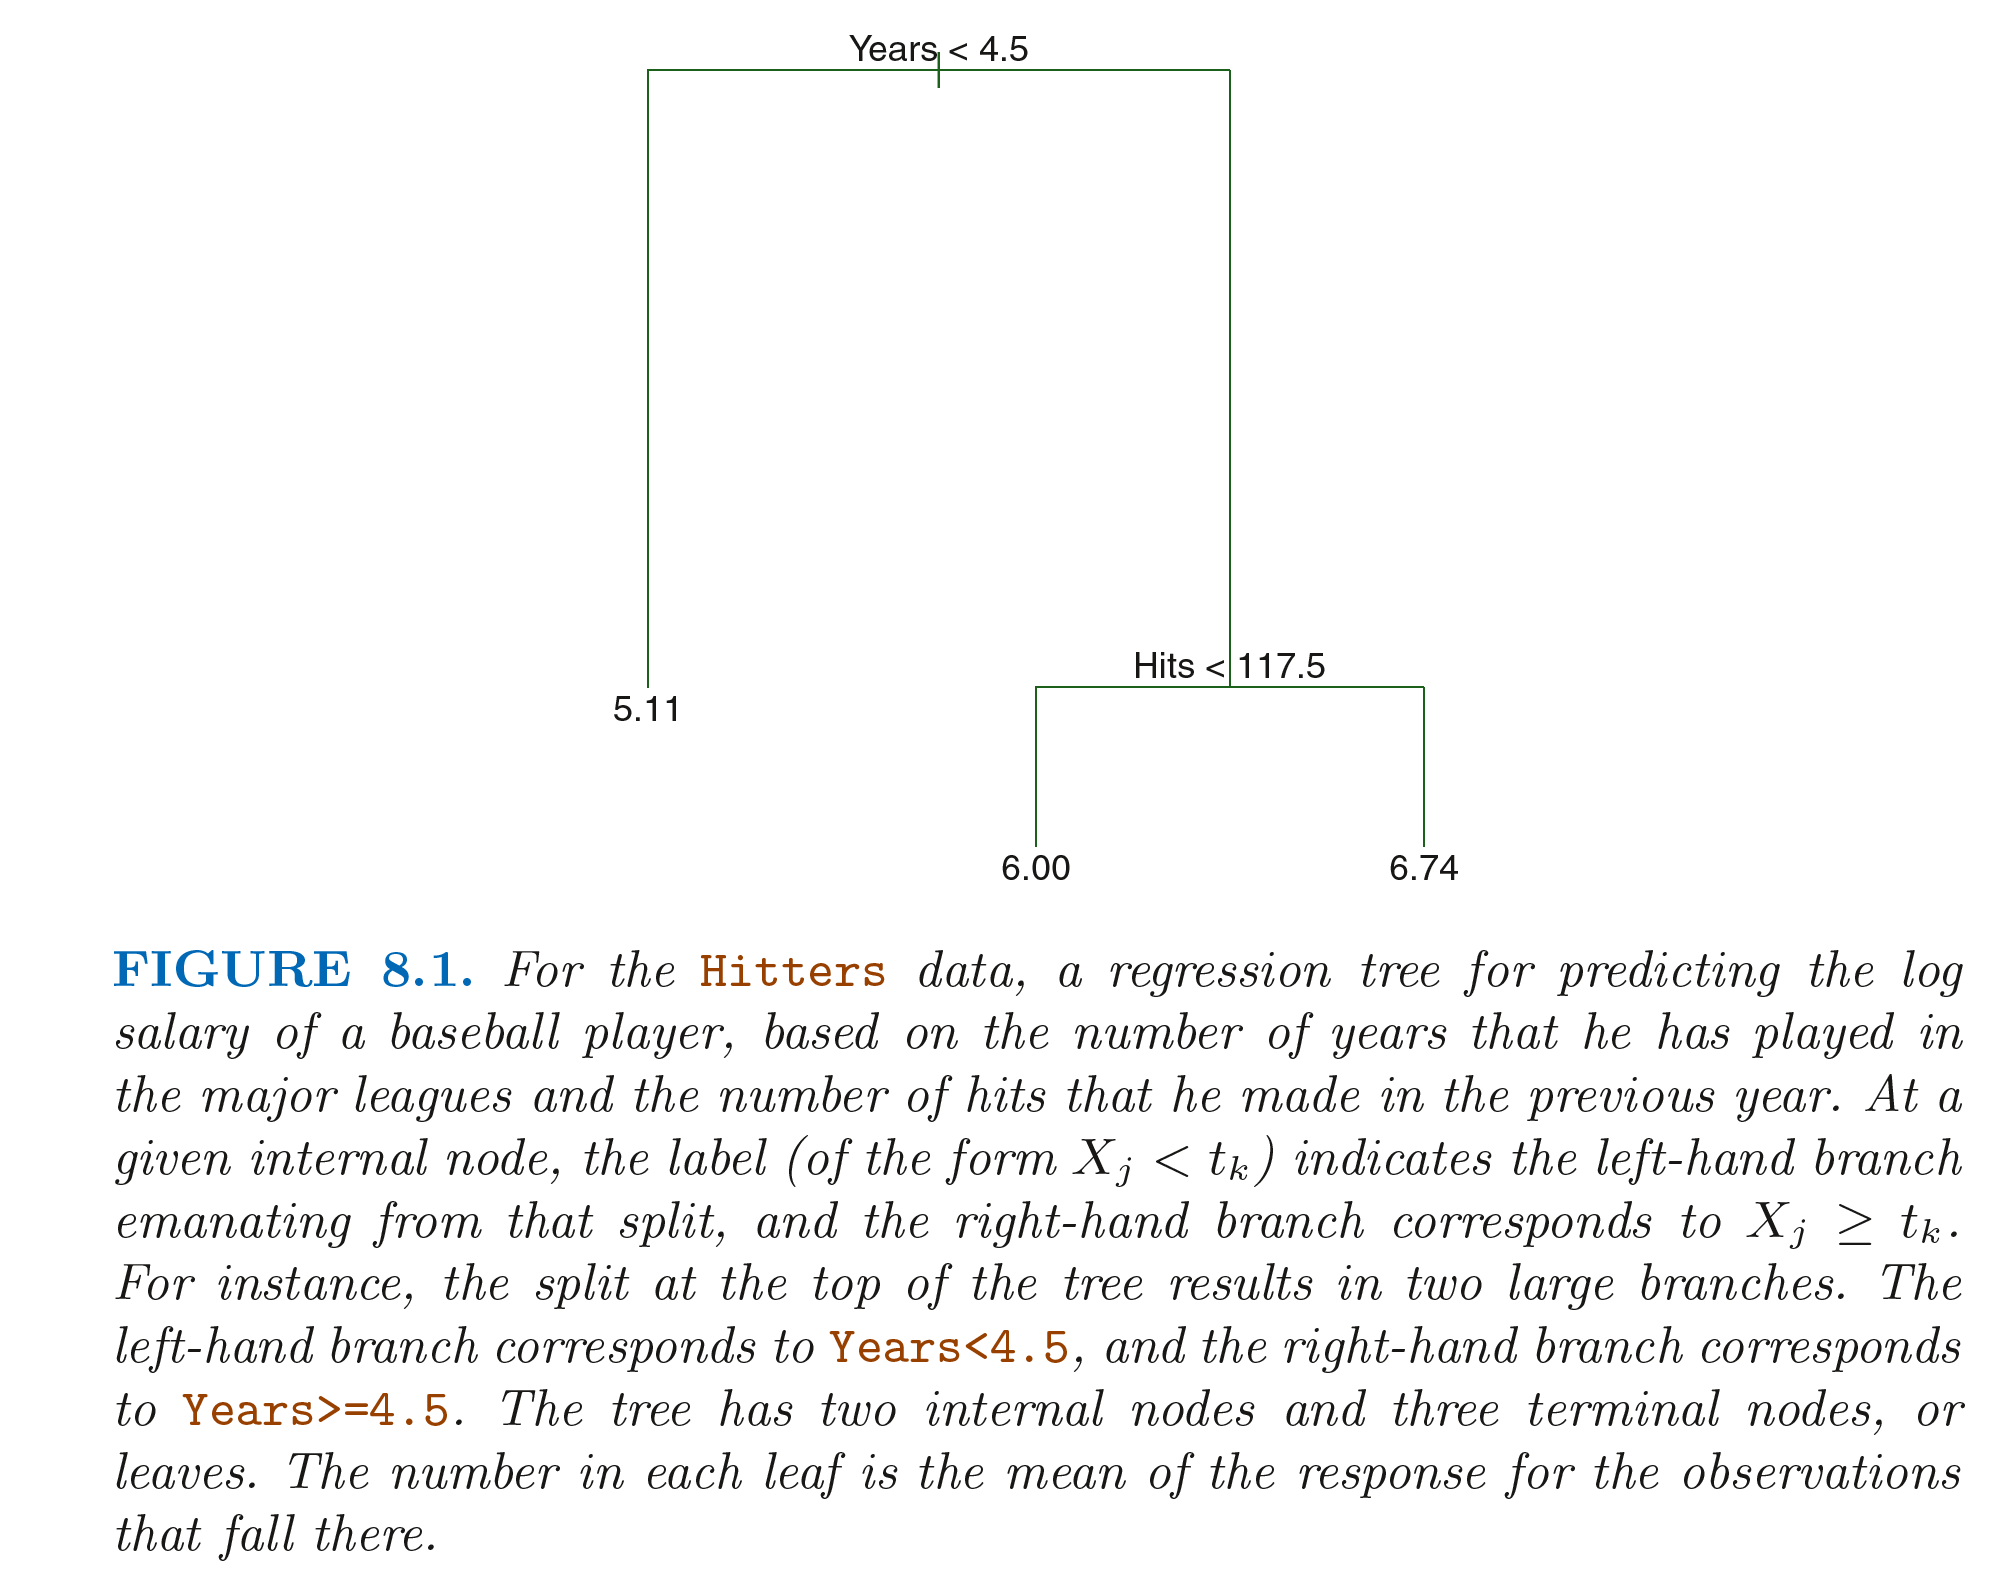

In [ ]:
from IPython.display import Image
Image('images/pw81.PNG', width =700)

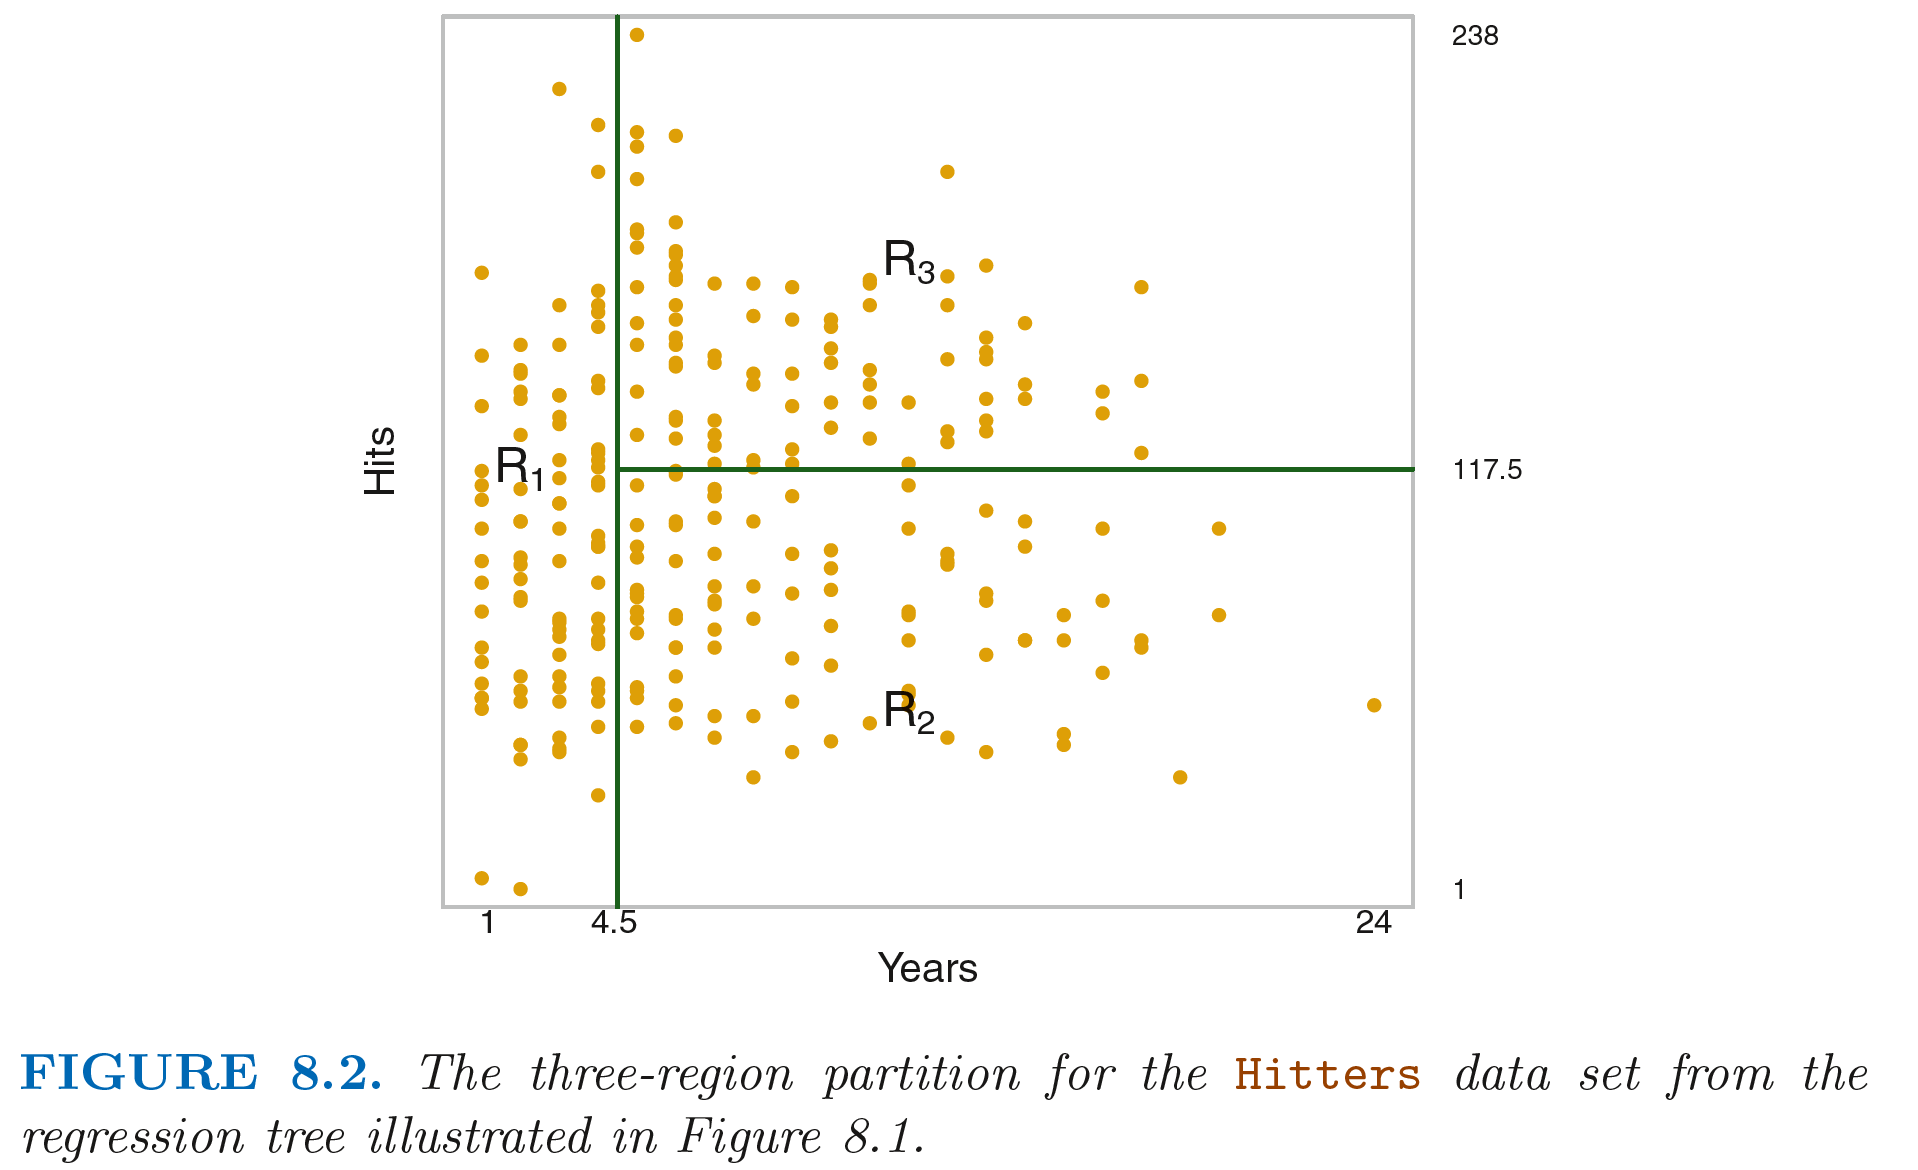

In [ ]:
Image('images/pw82.PNG', width =700)


## Decision Trees 决策树
+ Can be applied to both regression and classification.
+ Decision trees are graphics where you can start at the "root" and traverse your way down by making decisions at the "branches" before finally ending up at a "leaf" that gives you the prediction.
+ It usually drawn upside down (leaves at the bottom)
+ 可应用于回归和分类。
+ 决策树是一种图形，您可以从“根”开始，通过在“分支”处做出决策来向下遍历，最后到达为您提供预测的“叶子”。
+ 通常是上下颠倒绘制（叶子在底部）

![tree image](http://image.slidesharecdn.com/decisiontree-151015165353-lva1-app6892/95/classification-using-decision-tree-12-638.jpg?cb=1444928106)

+ **terminal node** - the regions or leaves of the tree. (3 terminal nodes)
+ **internal node** - the points along the tree where the predictor space is split. (2 internal nodes)
+ **branches** - the segments of the trees that connect the nodes.
+ Explanation for the example:
    + *Years* of experienced is the most important factor in determining *Salary*.
    + For experienced players, the number of *Hits* effect the *Salary*.
    
+ Two general steps for building a (regression) decision tree (Stratification)
1. Divide the predictor space into j number of regions
2. For each region, find the mean response and use it as the predicted value. This will minimize the squared error for that region.

+ The regions in theory can be divided in any crazy manner you choose but in practice, they are divided into high dimensional rectangles.
+ For example, you could have used a line with a non-zero slope to partition the region below to get a more accurate fit, but simplicity wins here and we just split on horizontal and vertical lines - "high dimensional rectangles".
+ **终端节点** - 树的区域或叶子。 （3个终端节点）
+ **内部节点** - 预测变量空间被分割的树上的点。 （2个内部节点）
+ **分支** - 连接节点的树段。
+ 示例说明：
     + *经验年数是决定*薪水*的最重要因素。
     + 对于经验丰富的玩家，*点击数*会影响*薪水*。
    
+ 构建（回归）决策树（分层）的两个一般步骤
1. 将预测空间划分为 j 个区域
2. 对于每个区域，找到平均响应并将其用作预测值。 这将最小化该区域的平方误差。

+ 理论上，区域可以按照您选择的任何疯狂方式进行划分，但实际上，它们被划分为高维矩形。
+ 例如，您可以使用具有非零斜率的线来划分下面的区域以获得更准确的拟合，但这里简单性获胜，我们只是在水平和垂直线上进行分割 - “高维矩形”。

### How do we get the branches? 我们如何获得树枝？
+ We could try and just build every single tree imaginable and find the tree with the lowest squared error but this is computationally infeasible even for a relatively small number of predictors.
+ Instead, a greedy approach is used by building the tree one branch at a time.
+ The first branch is constructed by testing out many different binary splits of the data.

+ For example, $X_1 < 5$ and  $X_1 >= 5$ would be one potential split.
+ $X_2 = YES$ and  $X_2 = NO$ could be another binary split.
+ Whichever split yields the lowest squared error would be considered the best split and that split would be chosen for the first branch.
+ This process now continues for each branch interactively until some stopping criteria is met (maximum number of branches, minimum number of observations in a certain branch, etc...).
+ 我们可以尝试构建每棵可以想象到的树，并找到平方误差最小的树，但即使对于相对较少数量的预测变量，这在计算上也是不可行的。
+ 相反，使用贪婪方法，一次构建一个分支。
+ 第一个分支是通过测试数据的许多不同的二进制分割来构建的。

+ 例如，$X_1 < 5$ 和 $X_1 >= 5$ 将是一种潜在的分割。
+ $X_2 = YES$ 和 $X_2 = NO$ 可能是另一个二进制分割。
+ 产生最小平方误差的分割将被视为最佳分割，并且该分割将被选择用于第一个分支。
+ 现在，每个分支都会以交互方式继续此过程，直到满足某些停止条件（分支的最大数量、某个分支中的最小观察数量等）。


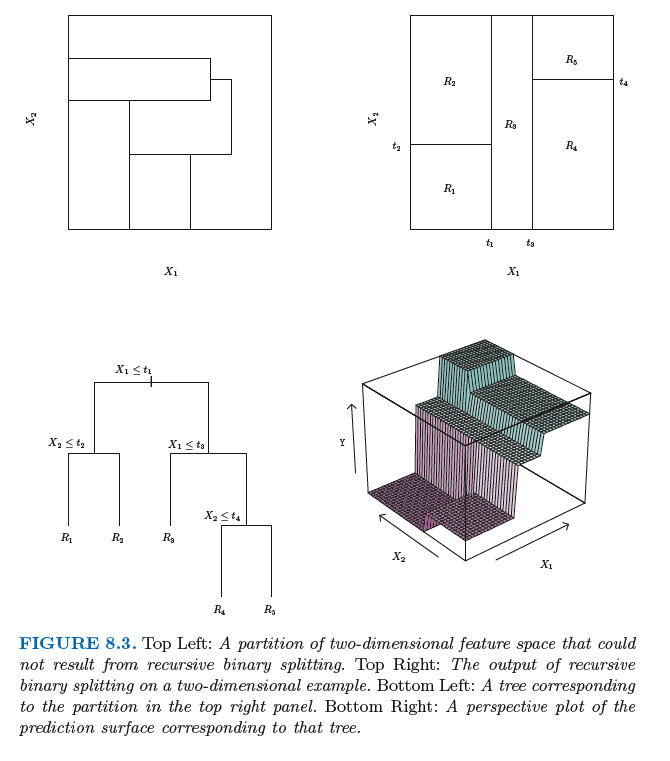

In [ ]:
Image('images/pw83.PNG', width =700)

### Tree Pruning 树木修剪
+ It is possible to build a decision tree so specific (one with so many branches) that each observation can be predicted exactly.
+ This would be complete memorization, ie overfitting, of the data.
+ Because we want to have the tree work with unseen data, we can prune the tree.

+ One strategy would be some have some threshold for stopping a branch from splitting - it must have decreased RSS by a certain amount.
+ Since this might miss a good split deeper in the tree, pruning is preferred.

Pruning works by:
+ growing a very large tree, $T_0$, and prune it back to obtain a subtree.
+ Goal is to select a subtree that leads to the lowest test error rate.
+ Use CV to select the best subtree.

Cost complexity pruning (weakest link pruning):
1. Use recursive binary splitting to grow a large tree on the training data, stopping only when a minimum number of observations are left in each terminal node.
2. At each stage during the growing process add a penalty term $\alpha|T|$ to RSS where |T| is the number of terminal nodes and $\alpha$ is the tuning parameter.
3. This will give a function that maps $\alpha$ to a particular subtree. So $\alpha = 0$ would map to the original huge tree and for example $\alpha = 5$ could map to a tree that with only half of the terminal nodes.
4. For each value of $\alpha$ there corresponds a subtree $T \subset T_0$ such that
$$ \sum_{m=1}^{|T|}\sum_{i: x_i \in R_m}{(y_i - \widehat{y}_{R_m})^2 + \alpha |T|}$$
is as small as possible.
    + $|T|$ - no. of terminal nodes
    + $R_m$ - rectangle corresponding to the $m$th terminal node

Choose $\alpha$ through cross validation by:
1. Splitting training data into K folds
2. Grow a large tree and apply the penalty term exactly as above (map each $\alpha$ to a particular subtree.)
3. evaluate each $\alpha$ (subtree) on the left-out fold
4. Average all the $\alpha$ (subtrees) for each iteration of the K-folds

Then use this $\alpha$ to choose the tree from above.


+ 可以构建一个非常具体的决策树（具有许多分支），以便可以准确预测每个观察结果。
+ 这将是对数据的完全记忆，即过度拟合。
+ 因为我们希望树能够处理看不见的数据，所以我们可以修剪树。

+ 一种策略是设置一些阈值来阻止分支分裂 - 它必须将 RSS 减少一定量。
+ 由于这可能会错过树中较深的良好分裂，因此最好进行修剪。

修剪的工作原理是：
+ 生长出一棵非常大的树 $T_0$，然后将其修剪回以获得子树。
+ 目标是选择导致测试错误率最低的子树。
+ 使用 CV 选择最佳子树。

成本复杂性修剪（最弱链接修剪）：
1. 使用递归二进制分裂在训练数据上生长出一棵大树，只有当每个终端节点中剩余的观察值最少时才停止。
2. 在生长过程的每个阶段，向 RSS 添加一个惩罚项 $\alpha|T|$，其中 |T| 是终端节点的数量，$\alpha$ 是调整参数。
3. 这将给出一个将 $\alpha$ 映射到特定子树的函数。因此，$\alpha = 0$ 将映射到原始的巨大树，例如 $\alpha = 5$ 可以映射到只有一半终端节点的树。
4. 对于每个 $\alpha$ 值，都对应一个子树 $T \subset T_0$，使得
$$ \sum_{m=1}^{|T|}\sum_{i: x_i \in R_m}{(y_i - \widehat{y}_{R_m})^2 + \alpha |T|}$$
尽可能小。
+ $|T|$ - 否。终端节点
+ $R_m$ - 对应于第 $m$ 个终端节点的矩形

通过交叉验证选择 $\alpha$：
1. 将训练数据拆分为 K 折
2. 培育一棵大树并完全按照上述方法应用惩罚项（将每个 $\alpha$ 映射到特定子树。）
3. 评估左侧折上的每个 $\alpha$（子树）
4. 为 K 折的每次迭代计算所有 $\alpha$（子树）的平均值

然后使用此 $\alpha$ 从上面选择树。


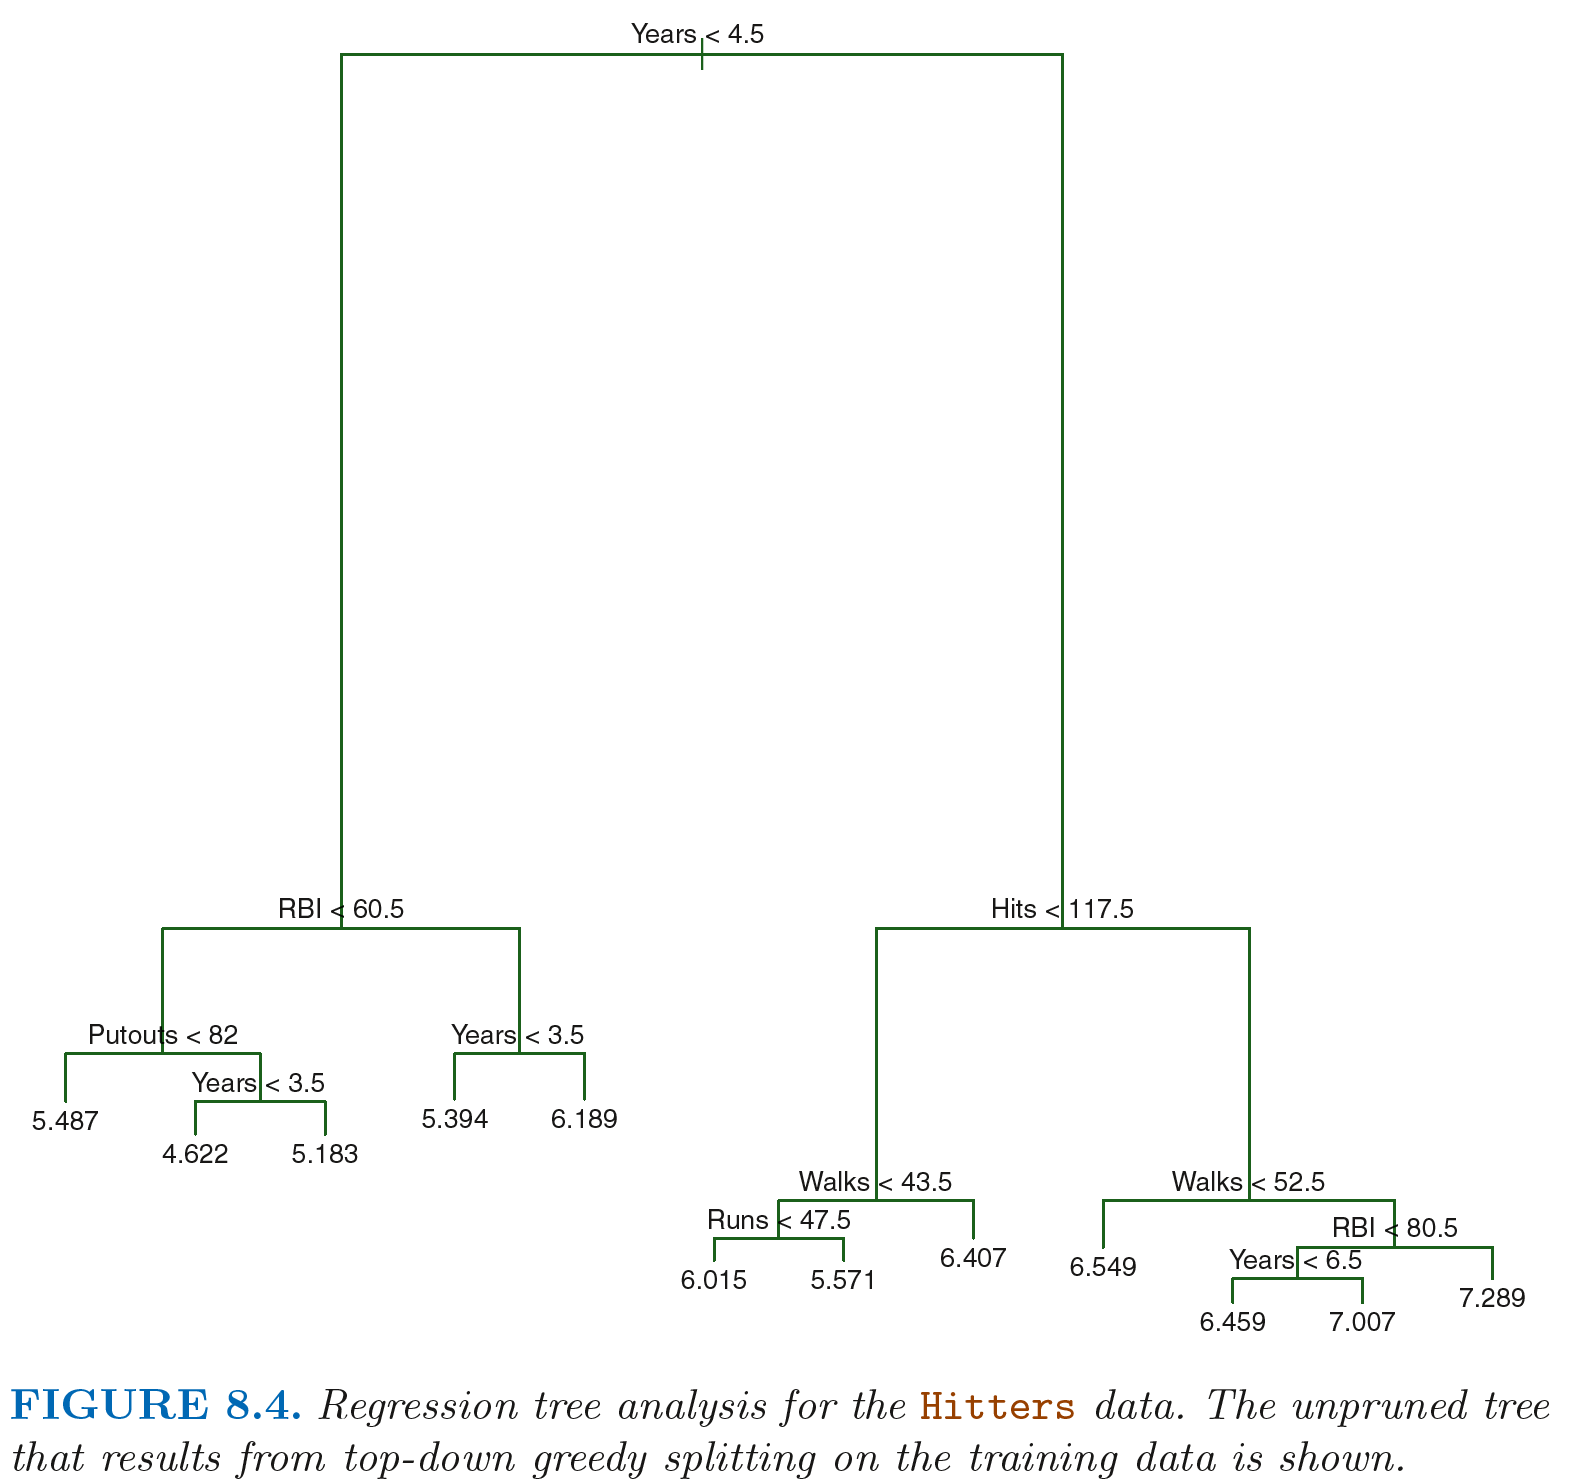

In [ ]:
Image('images/pw84.PNG', width =600)

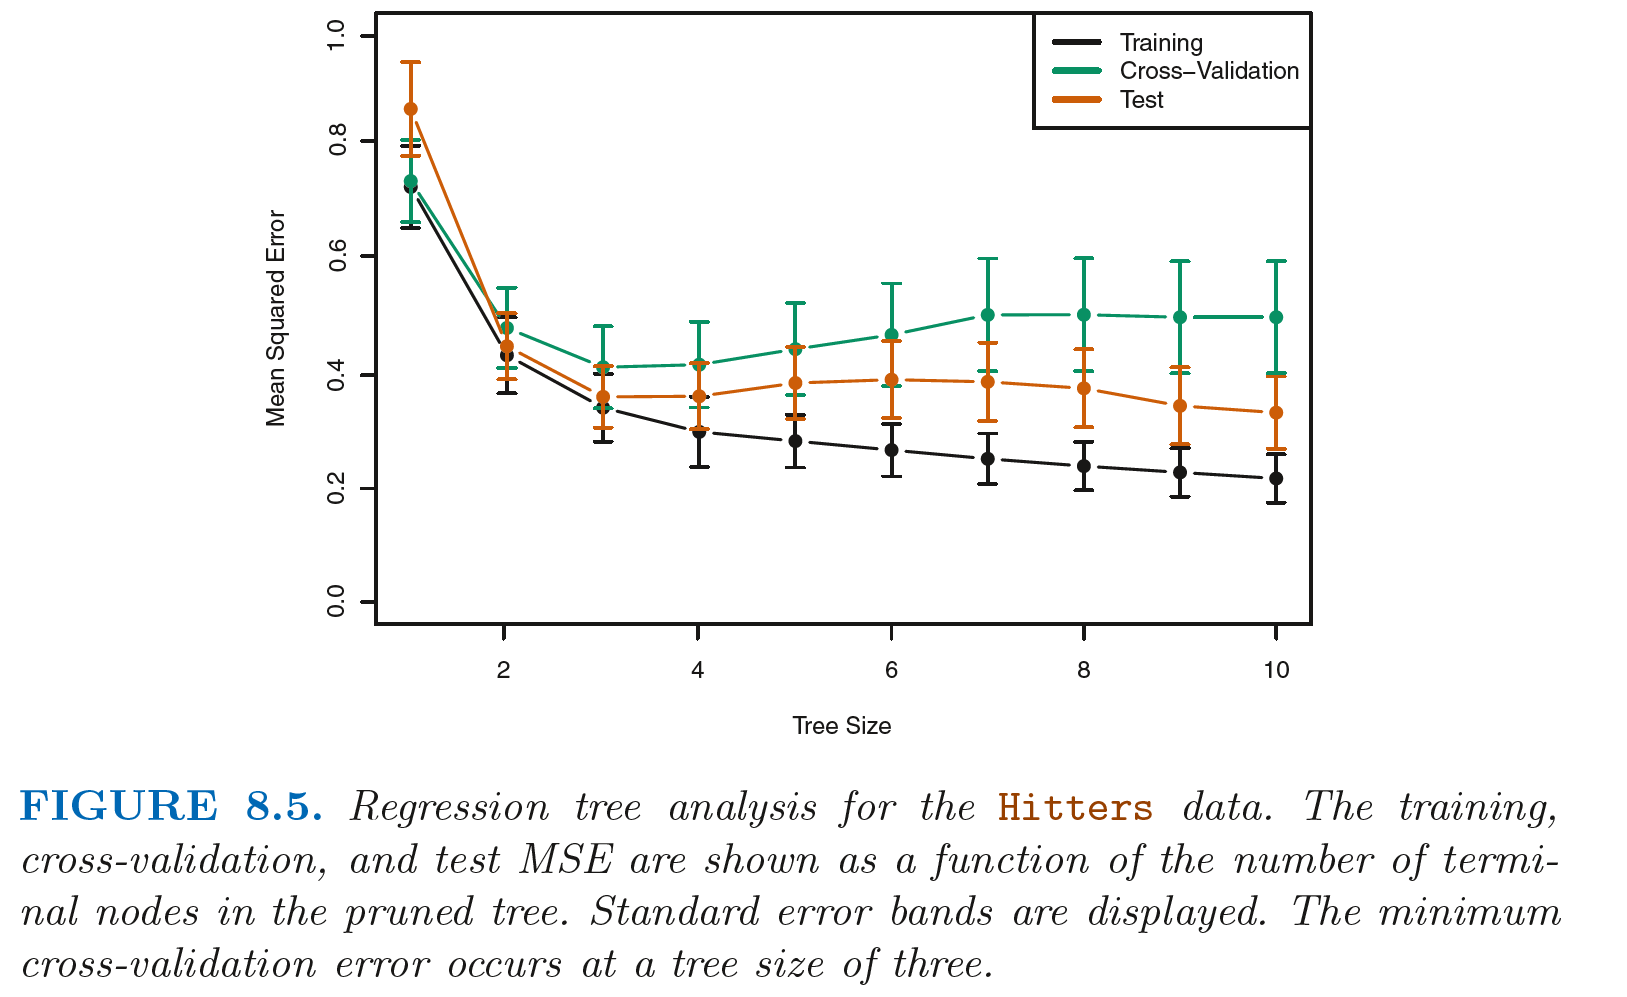

In [ ]:
Image('images/pw85.PNG', width =500)

### Classification Trees 分类树
+ Predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs.
+ Interested not only in the class prediction corresponding to a particular terminal node region, but also in the class proportions among the training observations that fall into that region.
+ RSS cannot be used as a criterion for making the binary splits.

+ 预测每个观测值属于其所属区域中最常见的训练观测值类。
+ 不仅对与特定终端节点区域相对应的类预测感兴趣，而且对落入该区域的训练观测值之间的类比例感兴趣。
+ RSS 不能用作进行二元分割的标准。

#### How to determine splits 如何确定分割
+ Three different metrics can be used.
+ First let $\hat{p}_{mk}$ be the proportion of region m with class k.
+ Remember that there can be many classes not just 2.
1. Classification error rate: $$E = 1 - \max_k(\hat{p}_{mk})$$
where $\max_k(\hat{p}_{mk})$ is the most common class.
2. Gini Index: $$G = \sum\limits_{k=1}^{K}\hat{p}_{mk}(1 - \hat{p}_{mk})$$
Gini index is referred to as a measure of node purity — a small value indicates that a node contains predominantly
observations from a single class.
3. Cross Entropy: $$D = - \sum\limits_{k=1}^{K}\hat{p}_{mk}\log\hat{p}_{mk}$$

+ Cross entropy and Gini are similar in that it will yield low scores if all of the $\hat{p}_{mk}$ close to 0 or 1.
+ Gini and Cross entropy take into account each class proportion while classification error rate only takes into account the highest occurring class
+ Both are more sensitive to node purity.
+ Classification error rate is preferable if prediction accuracy is the goal.


+ 可以使用三种不同的指标。
+ 首先让 $\hat{p}_{mk}$ 表示区域 m 中属于类别 k 的比例。
+ 请记住，类别可以有很多，而不仅仅是 2 个。
1. 分类错误率：$$E = 1 - \max_k(\hat{p}_{mk})$$
其中 $\max_k(\hat{p}_{mk})$ 是最常见的类别。
2. 基尼指数：$$G = \sum\limits_{k=1}^{K}\hat{p}_{mk}(1 - \hat{p}_{mk})$$
基尼指数被称为节点纯度的度量 — 较小的值表示节点主要包含来自单个类别的观察结果。
3. 交叉熵：$$D = - \sum\limits_{k=1}^{K}\hat{p}_{mk}\log\hat{p}_{mk}$$

+ 交叉熵和基尼系数相似，如果所有 $\hat{p}_{mk}$ 都接近 0 或 1，则会产生低分。
+ 基尼系数和交叉熵考虑了每个类别的比例，而分类错误率仅考虑出现次数最多的类别
+ 两者都对节点纯度更敏感。
+ 如果目标是预测准确性，则分类错误率是首选。

### Linear Model vs Trees 线性模型与树
+ If the decision boundary is linear and not rectangular then linear models can perform better than trees.
+ But for highly non-linear decision boundaries then trees can perform better.
+ Advantages of trees:
    + Trees are very easy to explain
    + more closely mirror human decision-making
    + can be displayed graphically, therefore easily interpreted
    + can easily handle qualitative predictors without the need to create dummy variables.
+ Disadvantages of trees:
    + level of prediction accuracy are lower
    + trees can be very non-robust. A small change in the data can cause a large change in the final estimated tree.


+ 如果决策边界是线性的而不是矩形的，那么线性模型的表现会比树更好。
+ 但对于高度非线性的决策边界，树的表现会更好。
+ 树的优点：
    + 树非常容易解释
    + 更接近人类的决策
    + 可以以图形方式显示，因此易于解释
    + 可以轻松处理定性预测变量，而无需创建虚拟变量。
+ 树的缺点:
    + 预测准确度较低
    + 树可能非常不稳健。数据的微小变化可能会导致最终估计的树发生很大变化。

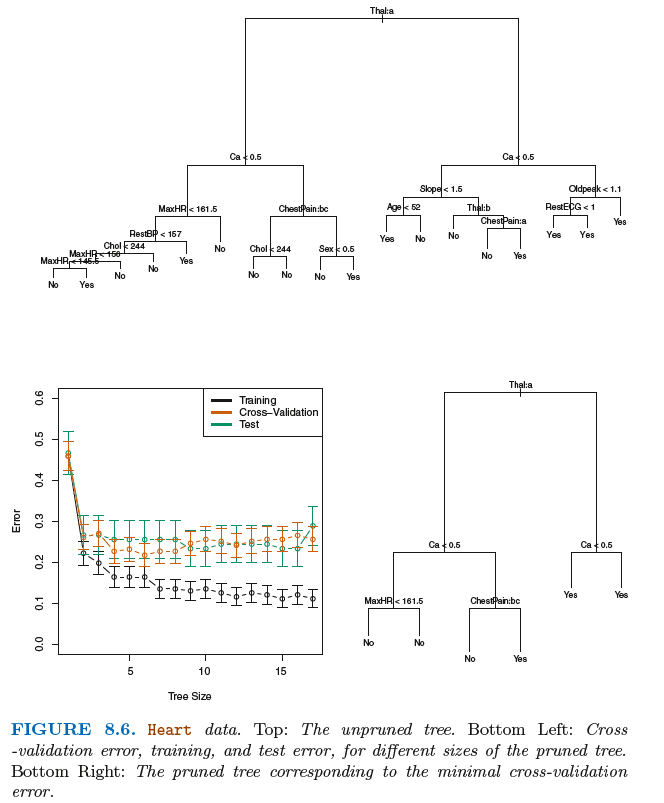

In [ ]:
Image('images/pw86.PNG', width =800)

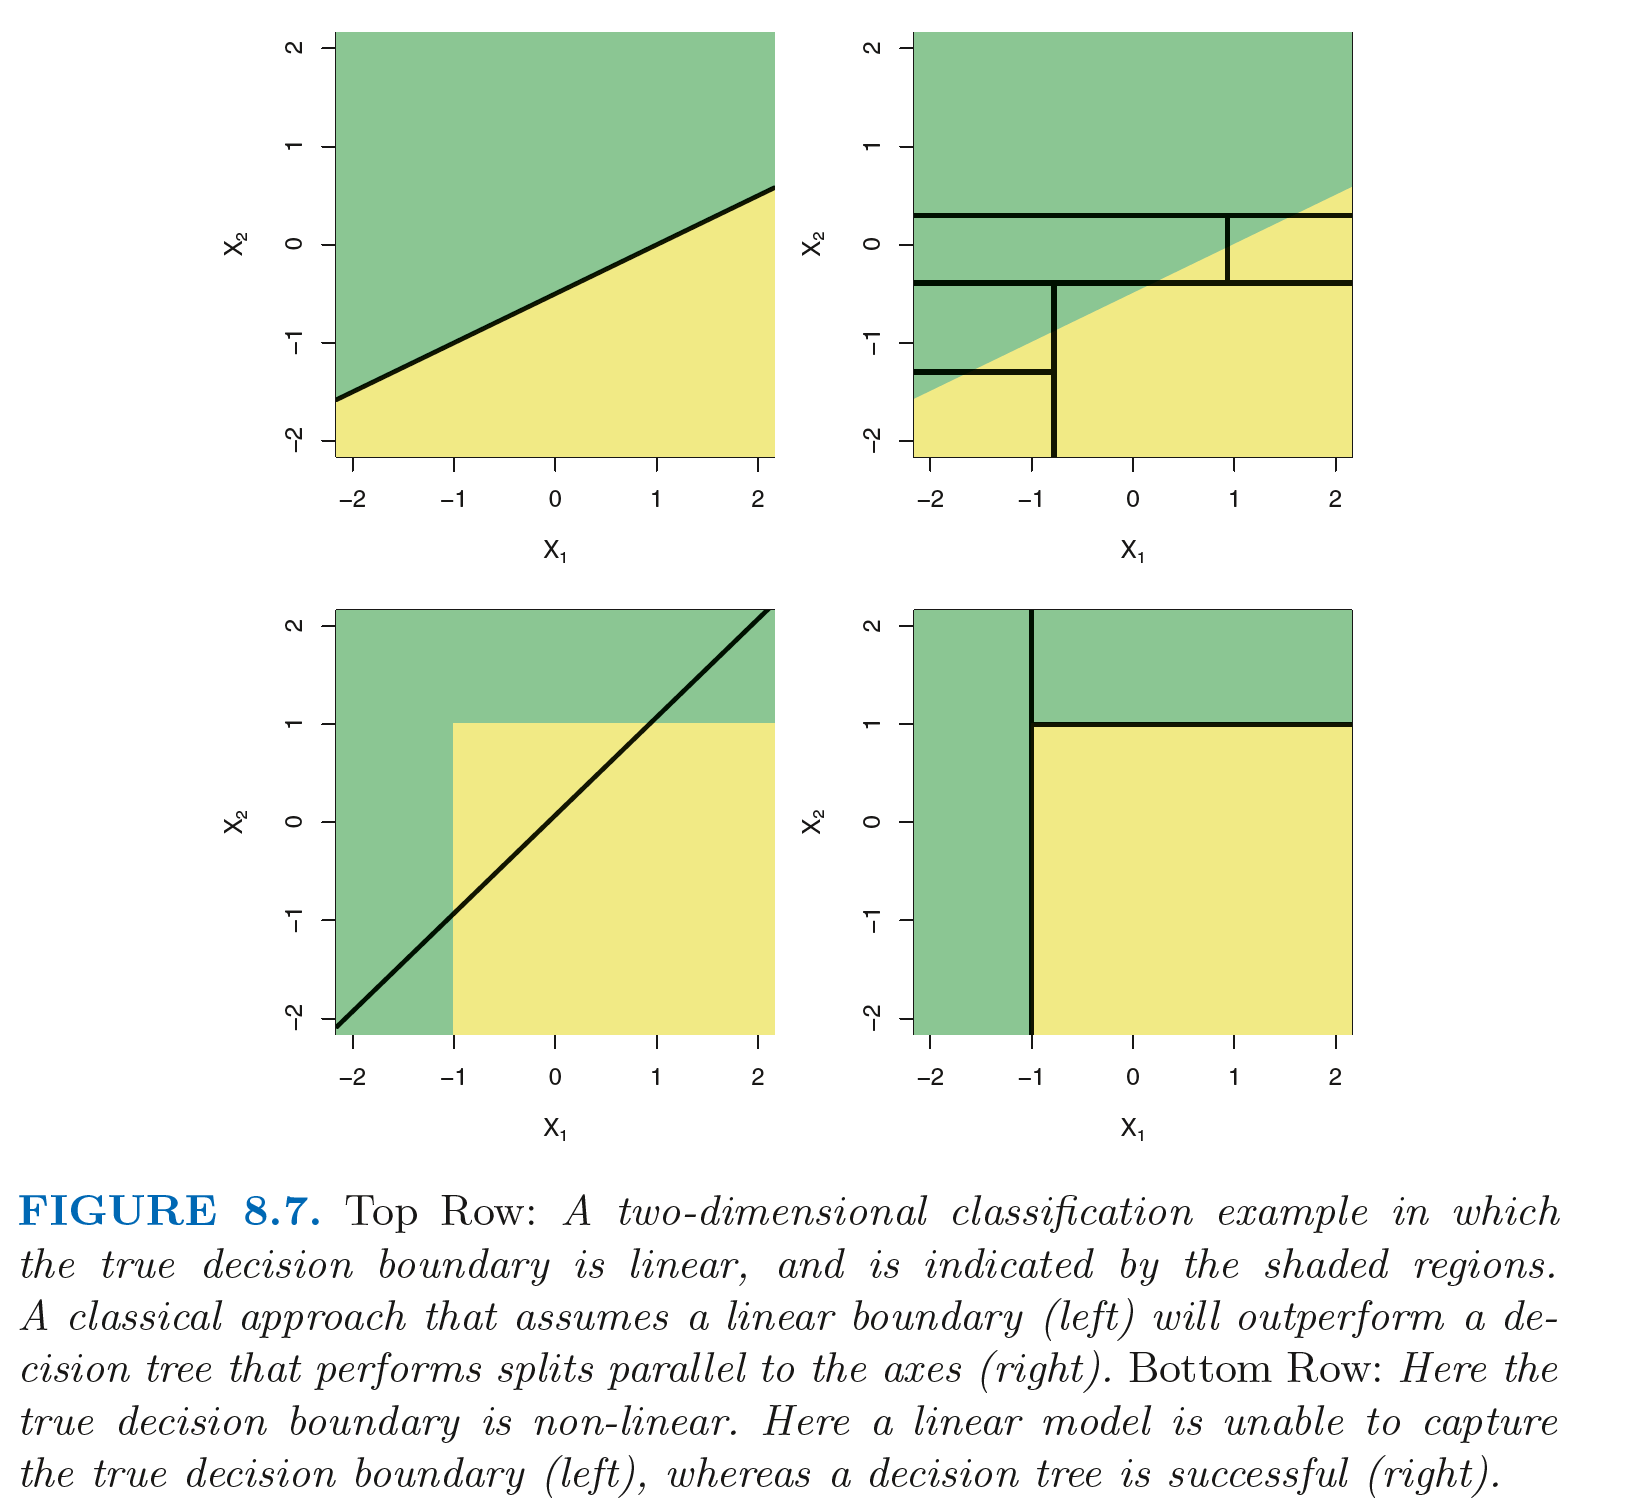

In [ ]:
Image('images/pw87.PNG', width =600)

### Lab 实验室
Need to install graphviz to create the decision tree

需要安装graphviz来创建决策树

Download here:
https://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [ ]:
!pip install graphviz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Graphviz/windows_10_cmake_Release_Graphviz-11.0.0-win64/Graphviz-11.0.0-win64/bin/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

### Lab: Classification Trees 实验室：分类树
We'll start by using **classification trees** to analyze the `Carseats` data set. In these
data, `Sales` is a continuous variable, and so we begin by converting it to a
binary variable. We use the `ifelse()` function to create a variable, called
`High`, which takes on a value of `Yes` if the `Sales` variable exceeds 8, and
takes on a value of `No` otherwise. We'll append this onto our dataFrame using the `.map()` function, and then do a little data cleaning to tidy things up:


我们将首先使用**分类树**来分析“Carseats”数据集。在这些数据中，“Sales”是一个连续变量，因此我们首先将其转换为二进制变量。我们使用“ifelse()”函数创建一个名为“High”的变量，如果“Sales”变量超过 8，则该变量的值为“Yes”，否则，该变量的值为“No”。我们将使用“.map()”函数将其附加到我们的数据框中，然后进行一些数据清理以整理数据：

In [ ]:
df3 = pd.read_csv('/content/carseats.csv')
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]
df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In order to properly evaluate the performance of a classification tree on
the data, we must estimate the test error rather than simply computing
the training error. We first split the observations into a training set and a test set:

为了正确评估分类树在数据上的表现，我们必须估计测试误差，而不是简单地计算训练误差。我们首先将观测值分成训练集和测试集：

In [ ]:
X = df3.drop(['Sales', 'High'], axis = 1)
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

We now use the DecisionTreeClassifier() function to fit a classification tree in order to predict High. Unfortunately, manual pruning is not implemented in sklearn: http://scikit-learn.org/stable/modules/tree.html

However, we can limit the depth of a tree using the max_depth parameter:


我们现在使用 DecisionTreeClassifier() 函数来拟合分类树，以便预测 High。不幸的是，sklearn 中没有实现手动修剪：http://scikit-learn.org/stable/modules/tree.html

但是，我们可以使用 max_depth 参数限制树的深度：

In [ ]:
classification_tree_carseats = DecisionTreeClassifier(max_depth = 6)
classification_tree_carseats.fit(X_train, y_train)
classification_tree_carseats.score(X_train, y_train)

0.921875

We see that the training accuracy is 92.2%.

One of the most attractive properties of trees is that they can be
graphically displayed. Unfortunately, this is a bit of a roundabout process in `sklearn`. We use the `export_graphviz()` function to export the tree structure to a temporary `.dot` file,
and the `graphviz.Source()` function to display the image:

我们看到训练准确率为 92.2%。

树最吸引人的特性之一是它们可以
以图形方式显示。不幸的是，这在 `sklearn` 中是一个有点迂回的过程。我们使用 `export_graphviz()` 函数将树结构导出到临时的 `.dot` 文件，
并使用 `graphviz.Source()` 函数显示图像：

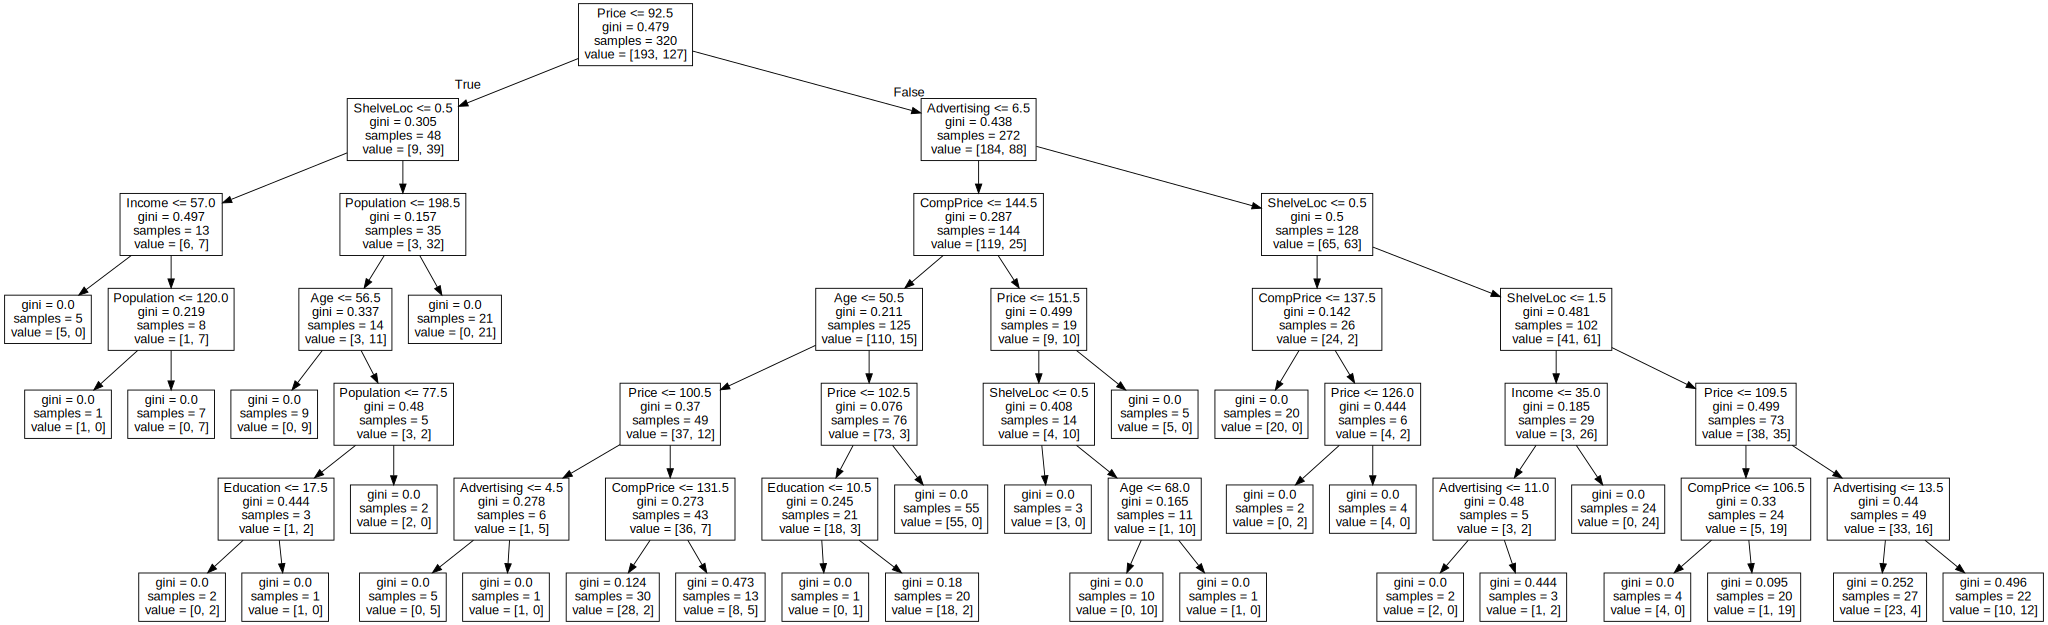

In [ ]:
export_graphviz(classification_tree_carseats,
                out_file = "carseat_tree.dot",
                feature_names = X_train.columns)

with open("carseat_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from subprocess import check_call
check_call(['dot','-Tpng','carseat_tree.dot','-o','carseat_tree.png'])

0

In [ ]:
y_train.value_counts()

High
0    193
1    127
Name: count, dtype: int64

In [ ]:
X_train.Price[X_train.Price<=92.5].shape

(48,)

+ True(Left) or False(Right) based on the conditions in the previous node
+ gini is the measure of impurity
+ samples are the number of observations remaining to classify
+ value is how many samples are in class 0(Low) and how many samples are in class 1(High)

The most important indicator of High sales appears to be Price.

Finally, let's evaluate the tree's performance on
the test data. The `predict()` function can be used for this purpose. We can then build a confusion matrix, which shows that we are making correct predictions for
around 72.5% of the test data set:


+ 根据上一个节点中的条件，判断为 True（左）或 False（右）
+ gini 是不纯度的度量
+ samples 是剩余要分类的观测值数量
+ value 是有多少个样本属于 0 类（低）以及有多少个样本属于 1 类（高）

高销量最重要的指标似乎是价格。

最后，让我们评估树在
测试数据上的表现。`predict()` 函数可用于此目的。然后，我们可以构建一个混淆矩阵，它显示我们对
大约 72.5% 的测试数据集做出了正确的预测：

In [ ]:
pred = classification_tree_carseats.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T,
                  index = ['No', 'Yes'],
                  columns = ['No', 'Yes'])
print(cm)
# (36+22)/80 = 0.745

     No  Yes
No   36   14
Yes   7   23


### Lab: Regression Trees 实验室：回归树
Now let's try fitting a regression tree to the Boston data set. First, we create a training set, and fit the tree to the training data using medv (median home value) as our response:

现在让我们尝试将回归树拟合到波士顿数据集。首先，我们创建一个训练集，并使用 medv（房屋中位价）作为响应，将树拟合到训练数据：

In [ ]:
boston_df = pd.read_csv('/content/boston.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X = boston_df.drop('medv', axis = 1)
y = boston_df.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# Pruning not supported. Choosing max depth 2) 不支持修剪。选择最大深度 2)
regr_tree_boston = DecisionTreeRegressor(max_depth = 2)
regr_tree_boston.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

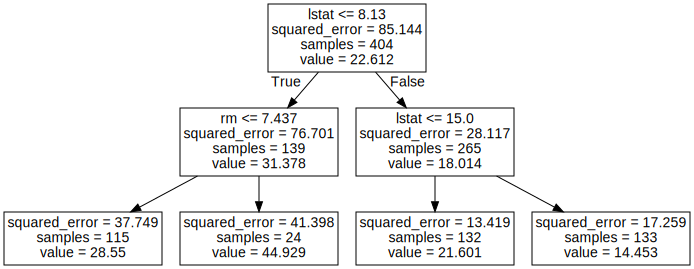

In [ ]:
export_graphviz(regr_tree_boston,
                out_file = "boston_tree.dot",
                feature_names = X_train.columns)

with open("boston_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

The variable `lstat` measures the percentage of individuals with lower
socioeconomic status. The tree indicates that lower values of `lstat` correspond
to more expensive houses. The tree predicts a median house price
of \$45,766 for larger homes (`rm>=7.4351`) in suburbs in which residents have high socioeconomic
status (`lstat<7.81`).

Now let's see how it does on the test data:

变量“lstat”衡量社会经济地位较低的个人所占的百分比。树状图显示“lstat”值越低，房屋越昂贵。树状图预测，在居民社会经济地位较高（‘lstat<7.81’）的郊区，较大房屋（‘rm>=7.4351’）的中位房价为 \$45,766。

现在让我们看看它在测试数据上的表现：

35.40621582879025

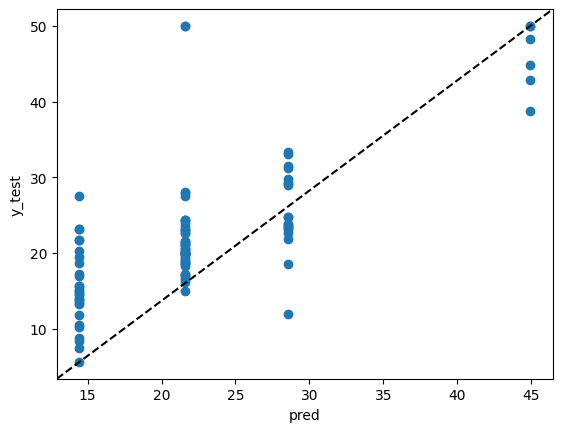

In [ ]:
pred = regr_tree_boston.predict(X_test)

plt.scatter(pred,
            y_test,
            label = 'medv')

plt.plot([0, 1],
         [0, 1],
         '--k',
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

The test set MSE associated with the regression tree is
35.4. The square root of the MSE is therefore around 5.95, indicating
that this model leads to test predictions that are within around \$5,950 of
the true median home value for the suburb.

与回归树相关的测试集 MSE 为
35.4。因此，MSE 的平方根约为 5.95，表明
该模型的测试预测值与郊区的真实房屋中位价相差约 \$5,950。


## Bagging 装袋
+ Decison trees suffer from high variance.
+ Bootstrap aggregation - a procedure for lowering variance of decision trees.
    + Bootstrapping - taking repeated samples with replacement and using each sample as an input into a learning method  
    + Aggregation - For Regression, average each prediction from each of these bootstrapped data sets.
$$\hat{f}_{\textrm{bag}}(x) = \frac{1}{B}\sum_{b=1}^B{\hat{f}^{*b}(x)}$$
    + For classification, use majority vote, the most commonly occurring class among the B predictions.

+ 决策树的方差较大。
+ 引导聚合 - 一种降低决策树方差的方法。
    + 引导 - 重复取样，并将每个样本作为学习方法的输入
    + 聚合 - 对于回归，从每个引导数据集中计算每个预测的平均值。
$$\hat{f}_{\textrm{bag}}(x) = \frac{1}{B}\sum_{b=1}^B{\hat{f}^{*b}(x)}$$
    + 对于分类，使用多数投票，即 B 个预测中最常见的类别。

### Validation with Out-of-bag error 使用袋外误差进行验证
+ Each bootstrap sample will contain on average 2/3 of the data points (because of sampling with replacement).
+ We can use the left over 1/3 as validation set and record errors for each point not in the sample.
+ The resulting OOB error is a valid estimate of the test error for the bagged model, since the response for each observation is predicted using only the trees that were not fit using that observation.
+ With B sufficiently large, OOB error is virtually equivalent to leave-one-out cross-validation error.


+ 每个引导样本平均包含 2/3 的数据点（因为有放回抽样）。
+ 我们可以使用剩余的 1/3 作为验证集，并记录样本中每个点的误差。
+ 由此产生的 OOB 误差是 bagged 模型测试误差的有效估计，因为每个观测的响应仅使用未使用该观测拟合的树来预测。
+ 当 B 足够大时，OOB 误差实际上相当于留一交叉验证误差。

### Variable Importance 变量重要性
+ The wonderful thing about decision trees is their ease of interpretability.
+ Bagging reduces this tremendously since we are averaging decisions together.
+ We can use the average amount of decrease in RSS/Gini-index that happens for each time a split happens with a particular predictor.
+ Generally, those predictors that are used higher up in the trees will cause a more massive decrease in RSS/Gini-index

+ 决策树的奇妙之处在于其易于解释。
+ 由于我们将决策平均化，因此 Bagging 极大地减少了这种情况。
+ 我们可以使用每次使用特定预测因子进行拆分时 RSS/Gini 指数的平均下降量。
+ 通常，树中较高位置使用的预测因子将导致 RSS/Gini 指数的更大幅度下降



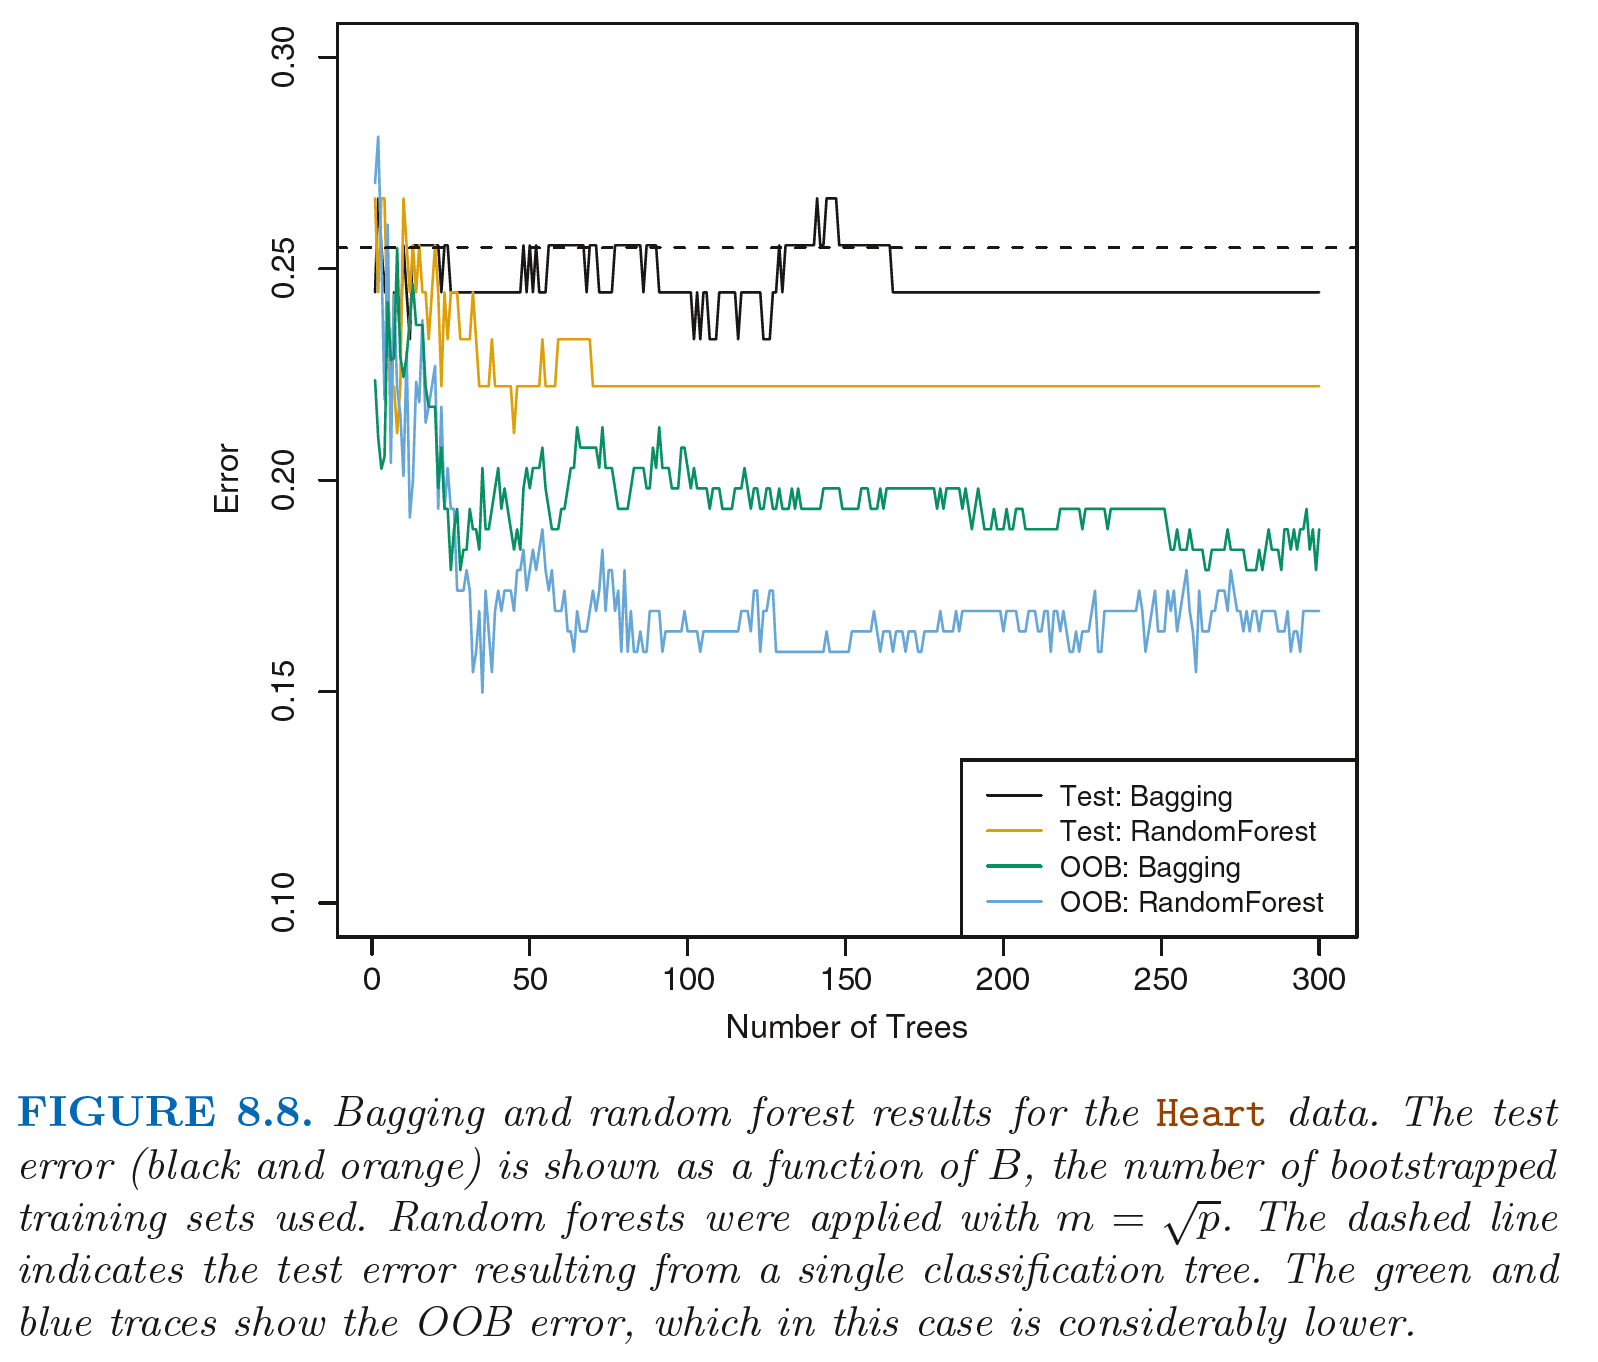

In [ ]:
Image('images/pw88.PNG', width =700)

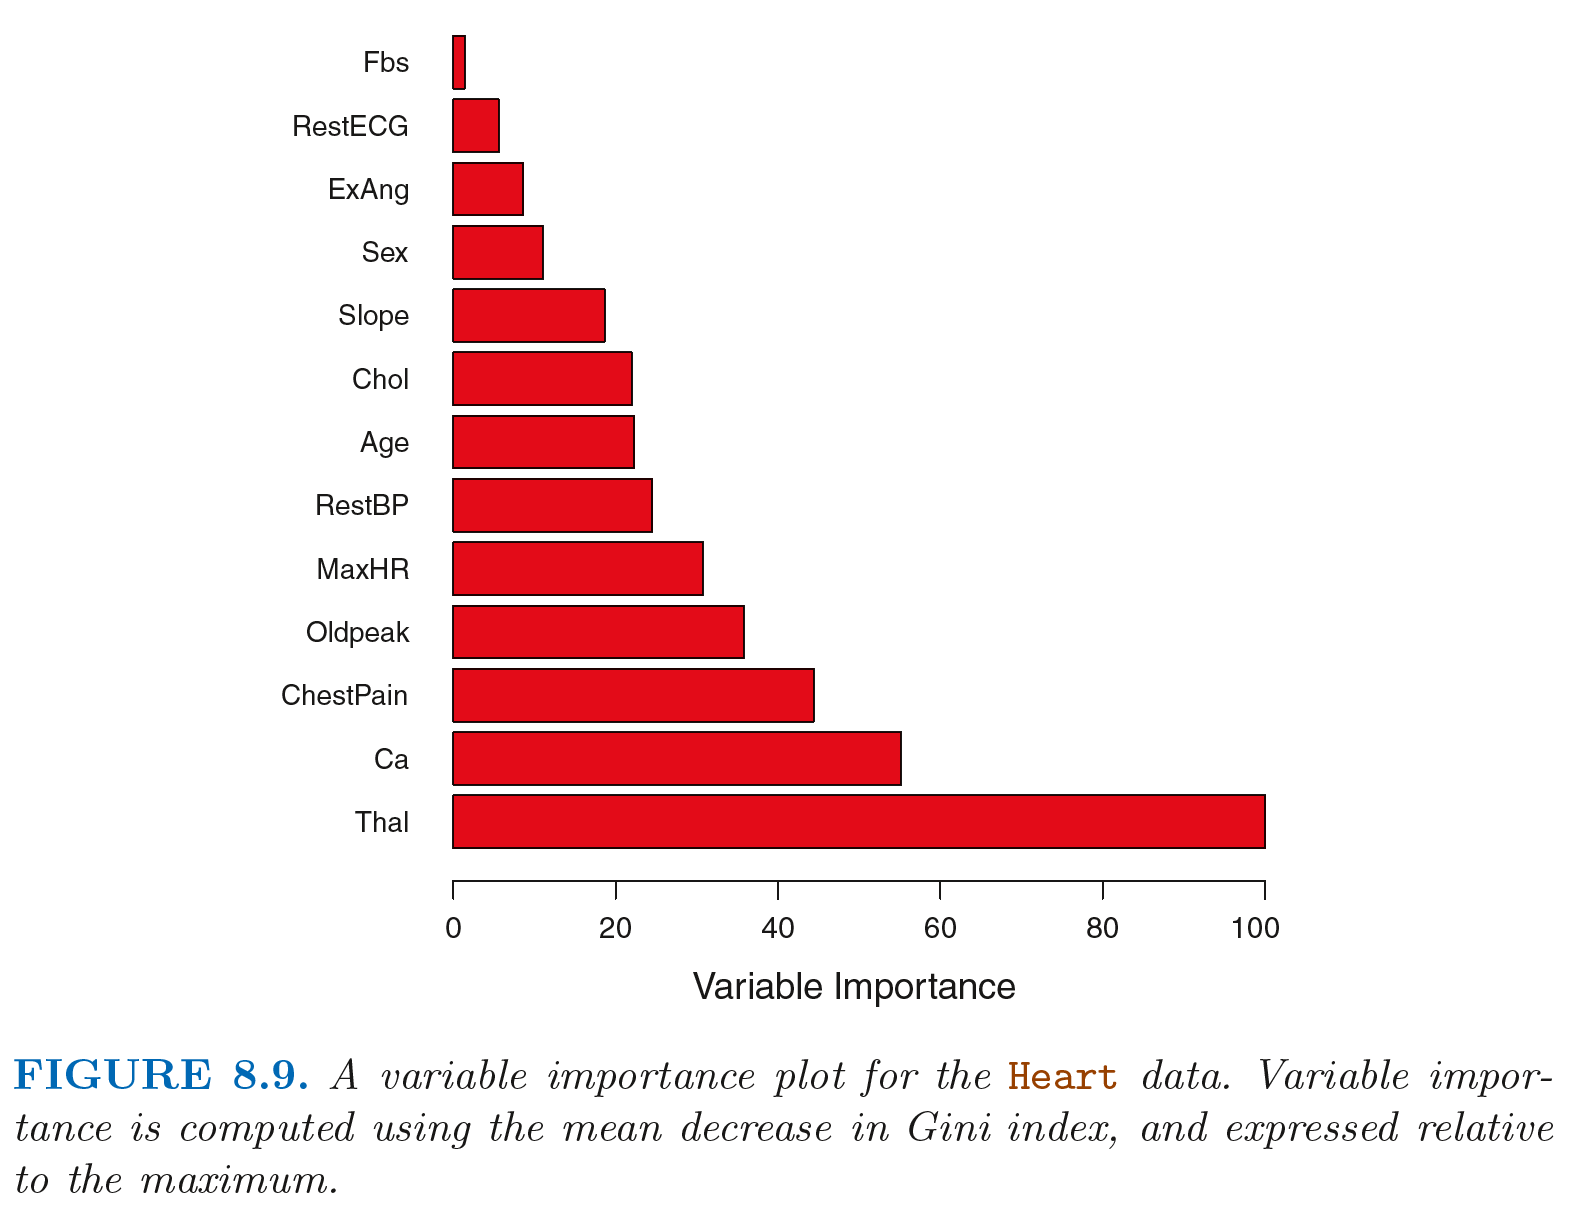

In [ ]:
Image('images/pw89.PNG', width =600)

## Random Forests 随机森林

+ Random Forests combine bagging with one additional feature - and that is to limit the features to split on at each node.
+ Instead of being able to split the data on any feature, only a subset of the features are considered at each stage.
+ A typical choice is the square root of the number of predictors, $m \approx \sqrt{p}$.
+ This ensures that the trees will look quite different and not nearly as correlated as bagged trees would be.
+ This also makes the trees significantly 'dumber' as they can only split on whatever random predictors it gets.
+ This process decorrelate the trees, thereby making the average of the resulting trees less variable and hence more reliable.
+ Refer Fig. 8.8


+ 随机森林将 bagging 与一个附加特征相结合 - 即限制每个节点上要拆分的特征。
+ 不是能够根据任何特征拆分数据，而是在每个阶段仅考虑特征的子集。
+ 典型的选择是预测变量数量的平方根，$m \approx \sqrt{p}$。
+ 这确保了树看起来会非常不同，并且相关性远不如 bagged 树。
+ 这也使树变得非常“愚蠢”，因为它们只能根据获得的任何随机预测变量进行拆分。
+ 这个过程使树去相关，从而使生成的树的平均值变化更小，因此更可靠。
+ 参见图 8.8

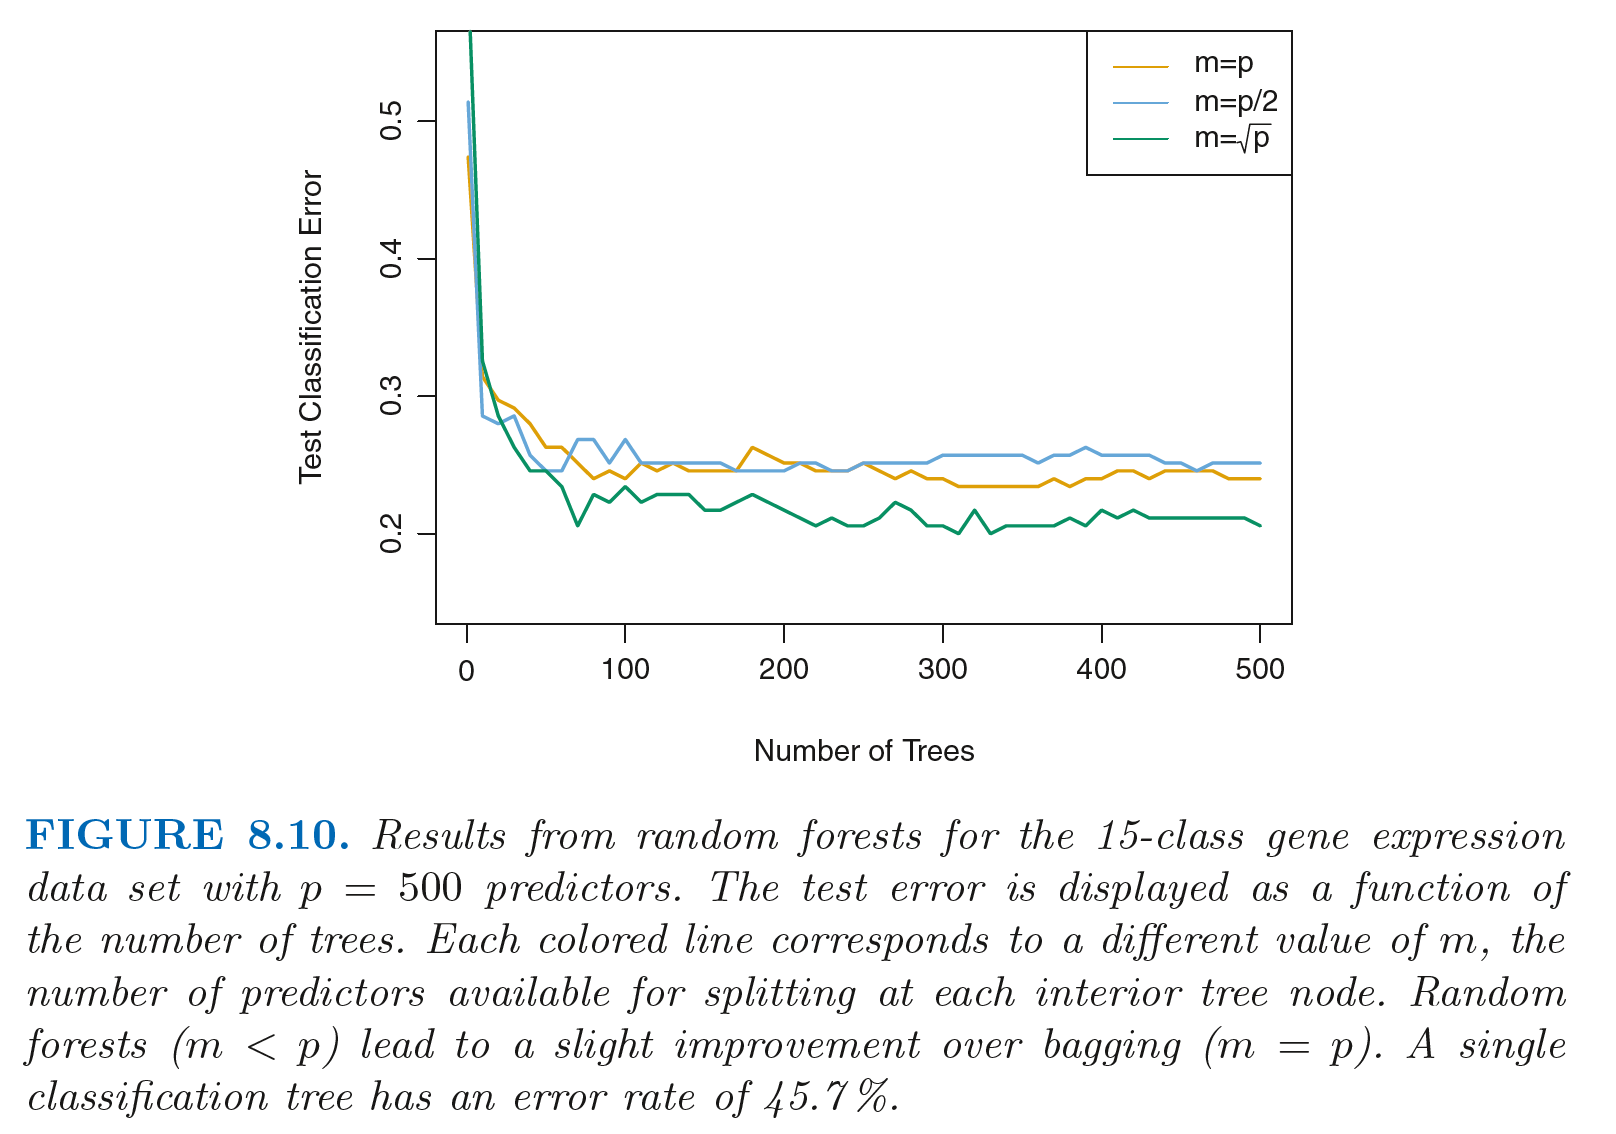

In [ ]:
Image('images/pw810.PNG', width =700)

### Lab: Bagging and Random Forests 实验室：Bagging 和随机森林

Let's see if we can improve on this result using **bagging** and **random forests**. The exact results obtained in this section may
depend on the version of `python` and the version of the `RandomForestRegressor` package
installed on your computer, so don't stress out if you don't match up exactly with the book. Recall that **bagging** is simply a special case of
a **random forest** with $m = p$. Therefore, the `RandomForestRegressor()` function can
be used to perform both random forests and bagging. Let's start with bagging:


让我们看看是否可以使用**bagging**和**随机森林**来改进这个结果。本节中获得的确切结果可能取决于计算机上安装的`python`版本和`RandomForestRegressor`包的版本，因此如果您与书中的内容不完全匹配，请不要担心。回想一下，**bagging**只是**随机森林**的一个特例，其中$m = p$。因此，`RandomForestRegressor()`函数可用于执行随机森林和bagging。让我们从bagging开始：

In [ ]:
# Bagging: using all features Bagging：使用所有特征
bagged_boston = RandomForestRegressor(max_features = 13, random_state = 1)
bagged_boston.fit(X_train, y_train)

RandomForestRegressor(max_features=13, random_state=1)

The argument `max_features = 13` indicates that all 13 predictors should be considered
for each split of the tree -- in other words, that bagging should be done. How
well does this bagged model perform on the test set?

参数 `max_features = 13` 表示对于树的每次分割，应该考虑所有 13 个预测因子 - 换句话说，应该进行装袋。这个装袋模型在测试集上的表现如何？

19.46097414705883

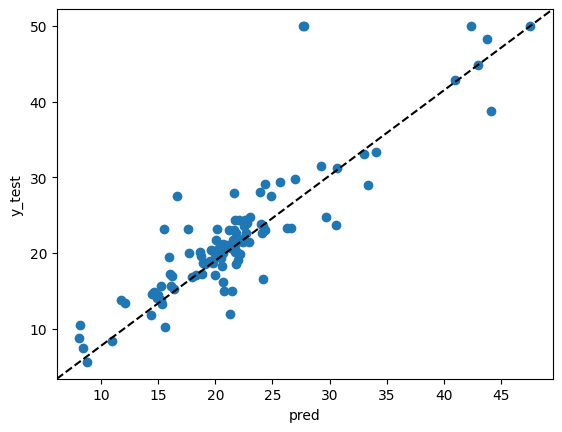

In [ ]:
pred = bagged_boston.predict(X_test)

plt.scatter(pred,
            y_test,
            label = 'medv')

plt.plot([0, 1],
         [0, 1],
         '--k',
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

The test set MSE associated with the bagged regression tree is significantly lower than our single tree!

We can grow a random forest in exactly the same way, except that
we'll use a smaller value of the `max_features` argument. Here we'll
use `max_features = 6`:

与 bagged 回归树相关的测试集 MSE 明显低于我们的单棵树！

我们可以用完全相同的方式构建随机森林，只是
我们将使用较小的 `max_features` 参数值。这里我们将
使用 `max_features = 6`：

In [ ]:
# Random forests: using 6 features 随机森林：使用 6 个特征
random_forest_boston = RandomForestRegressor(max_features = 6, random_state = 1)

random_forest_boston.fit(X_train, y_train)

pred = random_forest_boston.predict(X_test)
mean_squared_error(y_test, pred)

22.080069764705893

The test set MSE is even lower; this indicates that random forests yielded an
improvement over bagging in this case.

Using the `feature_importances_` attribute of the `RandomForestRegressor`, we can view the importance of each
variable:

测试集 MSE 甚至更低；这表明随机森林在这种情况下比 bagging 取得了进步。

使用 `RandomForestRegressor` 的 `feature_importances_` 属性，我们可以查看每个变量的重要性：

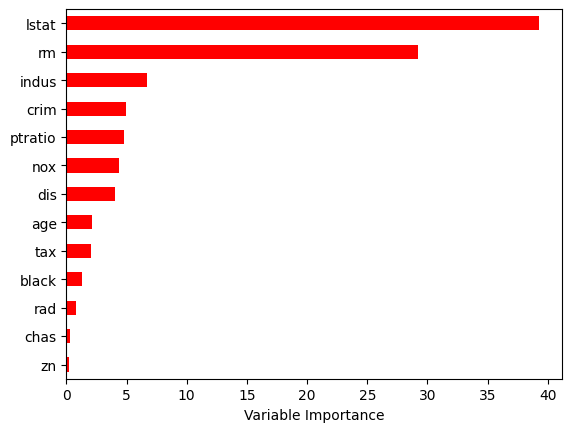

In [ ]:
Importance = pd.DataFrame({'Importance':random_forest_boston.feature_importances_*100},
                          index = X.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The results indicate that across all of the trees considered in the random
forest, the wealth level of the community (`lstat`) and the house size (`rm`)
are by far the two most important variables.

结果表明，在随机森林中考虑的所有树中，社区的财富水平（“lstat”）和房屋大小（“rm”）是迄今为止最重要的两个变量。

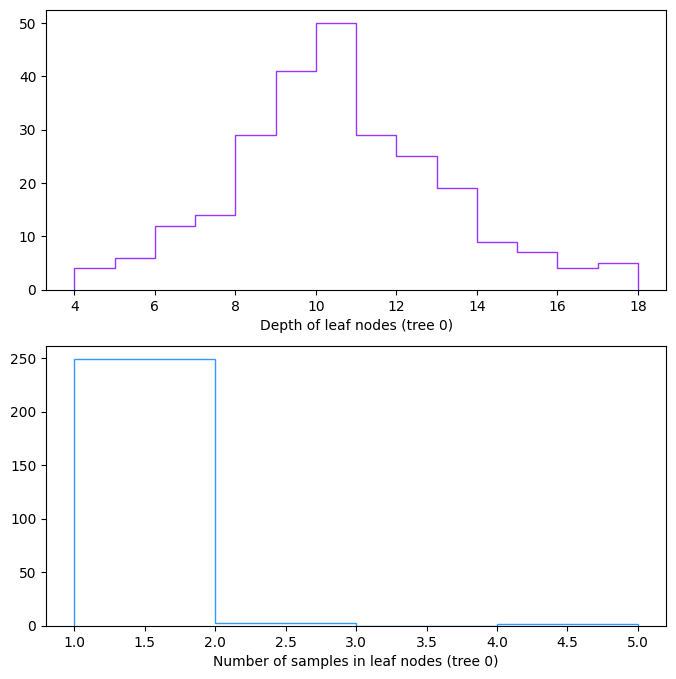

In [ ]:
from sklearn.tree import _tree

def leaf_depths(tree, node_id = 0):

     '''
     tree.children_left and tree.children_right store ids
     of left and right chidren of a given node
     tree.children_left 和 tree.children_right 存储给定节点的左子节点和右子节点的 id
     '''
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     '''
     If a given node is terminal,
     both left and right children are set to _tree.TREE_LEAF
     如果给定节点是终端节点，则左子节点和右子节点均设置为 _tree.TREE_LEAF
     '''
     if left_child == _tree.TREE_LEAF:

         '''
         Set depth of terminal nodes to 0
         将终端节点的深度设置为 0
         '''
         depths = np.array([0])

     else:

         '''
         Get depths of left and right children and
         increment them by 1
         获取左子节点和右子节点的深度并将其加 1
         '''
         left_depths = leaf_depths(tree, left_child) + 1
         right_depths = leaf_depths(tree, right_child) + 1

         depths = np.append(left_depths, right_depths)

     return depths

def leaf_samples(tree, node_id = 0):

     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     if left_child == _tree.TREE_LEAF:

         samples = np.array([tree.n_node_samples[node_id]])

     else:

         left_samples = leaf_samples(tree, left_child)
         right_samples = leaf_samples(tree, right_child)

         samples = np.append(left_samples, right_samples)

     return samples

def draw_tree(ensemble, tree_id=0):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     tree = ensemble.estimators_[tree_id].tree_

     depths = leaf_depths(tree)
     plt.hist(depths, histtype='step', color='#9933ff',
              bins=range(min(depths), max(depths)+1))

     plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)

     plt.subplot(212)

     samples = leaf_samples(tree)
     plt.hist(samples, histtype='step', color='#3399ff',
              bins=range(min(samples), max(samples)+1))

     plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)

     plt.show()

draw_tree(random_forest_boston)

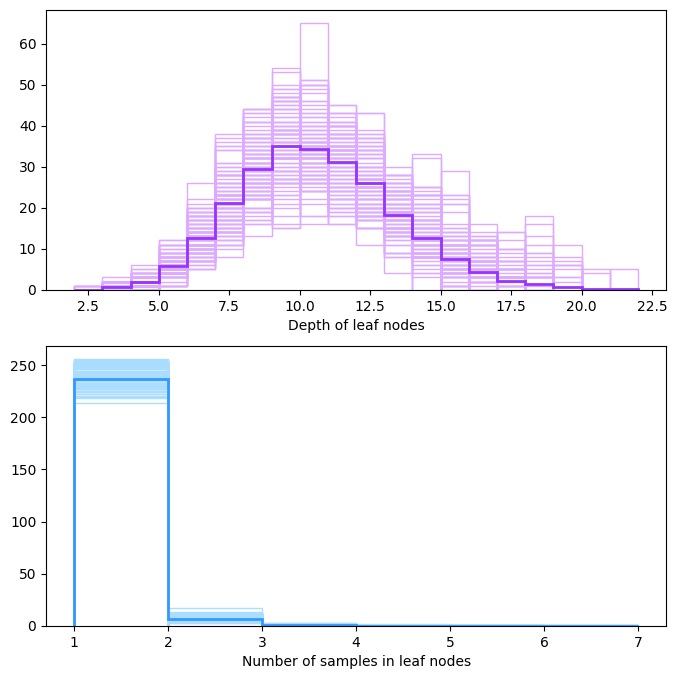

In [ ]:
def draw_ensemble(ensemble):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     depths_all = np.array([], dtype=int)

     for x in ensemble.estimators_:
         tree = x.tree_
         depths = leaf_depths(tree)
         depths_all = np.append(depths_all, depths)
         plt.hist(depths, histtype='step', color='#ddaaff',
                  bins=range(min(depths), max(depths)+1))

     plt.hist(depths_all, histtype='step', color='#9933ff',
              bins=range(min(depths_all), max(depths_all)+1),
              weights=np.ones(len(depths_all))/len(ensemble.estimators_),
              linewidth=2)
     plt.xlabel("Depth of leaf nodes")

     samples_all = np.array([], dtype=int)

     plt.subplot(212)

     for x in ensemble.estimators_:
         tree = x.tree_
         samples = leaf_samples(tree)
         samples_all = np.append(samples_all, samples)
         plt.hist(samples, histtype='step', color='#aaddff',
                  bins=range(min(samples), max(samples)+1))

     plt.hist(samples_all, histtype='step', color='#3399ff',
              bins=range(min(samples_all), max(samples_all)+1),
              weights=np.ones(len(samples_all))/len(ensemble.estimators_),
              linewidth=2)
     plt.xlabel("Number of samples in leaf nodes")

     plt.show()

draw_ensemble(random_forest_boston)



## Boosting 提升
+ Boosting can be used (like bagging) for many different learning algorithms.
+ Trees are grown sequentially. Each tree is grown using information from a previous tree.
+ Boosting learns slowly. A tree is fit to the *residuals* of the model and not the outcome Y.
+ Each tree can be small with just a few terminal nodes.
+ The new trees keep focusing on areas where the model performs poorly.
+ For classification problems the log-odds are used to find the residuals.

Parameters to model,
* B - the number of trees to fit
* d - the max number of terminal nodes for each tree
* $\lambda$ - learning (shrinkage) parameter that determines how much weight to assign to each tree. It control the speed of the process. (0.01 or 0.001)

Add up all trees (times $\lambda$) together to get final model.
$$\hat{f}(x) = \sum_{b=1}^B{\lambda \hat{f}^b(x)}$$


+ Boosting 可以（像 bagging 一样）用于许多不同的学习算法。
+ 树是按顺序生长的。每棵树都使用前一棵树的信息来生长。
+ Boosting 学习速度很慢。一棵树适合模型的 *残差*，而不是结果 Y。
+ 每棵树可以很小，只有几个终端节点。
+ 新树继续关注模型表现不佳的区域。
+ 对于分类问题，对数几率用于查找残差。

模型参数，
* B - 要拟合的树数
* d - 每棵树的最大终端节点数
* $\lambda$ - 学习（收缩）参数，确定分配给每棵树的权重。它控制过程的速度。（0.01 或 0.001）

将所有树（乘以 $\lambda$）加在一起以获得最终模型。
$$\hat{f}(x) = \sum_{b=1}^B{\lambda \hat{f}^b(x)}$$

### Ensemble of weak learners 弱学习者集合
Random forest and Boosted trees are two excellent algorithms that both use 'weak' learners. On their own each learner is quite terrible but when combined together with many, make them very powerful, more powerful than an expert in many cases.

随机森林和增强树是两种使用“弱”学习器的优秀算法。每个学习器单独使用时都非常糟糕，但当多个学习器组合在一起时，它们就会变得非常强大，在许多情况下甚至比专家还要强大。

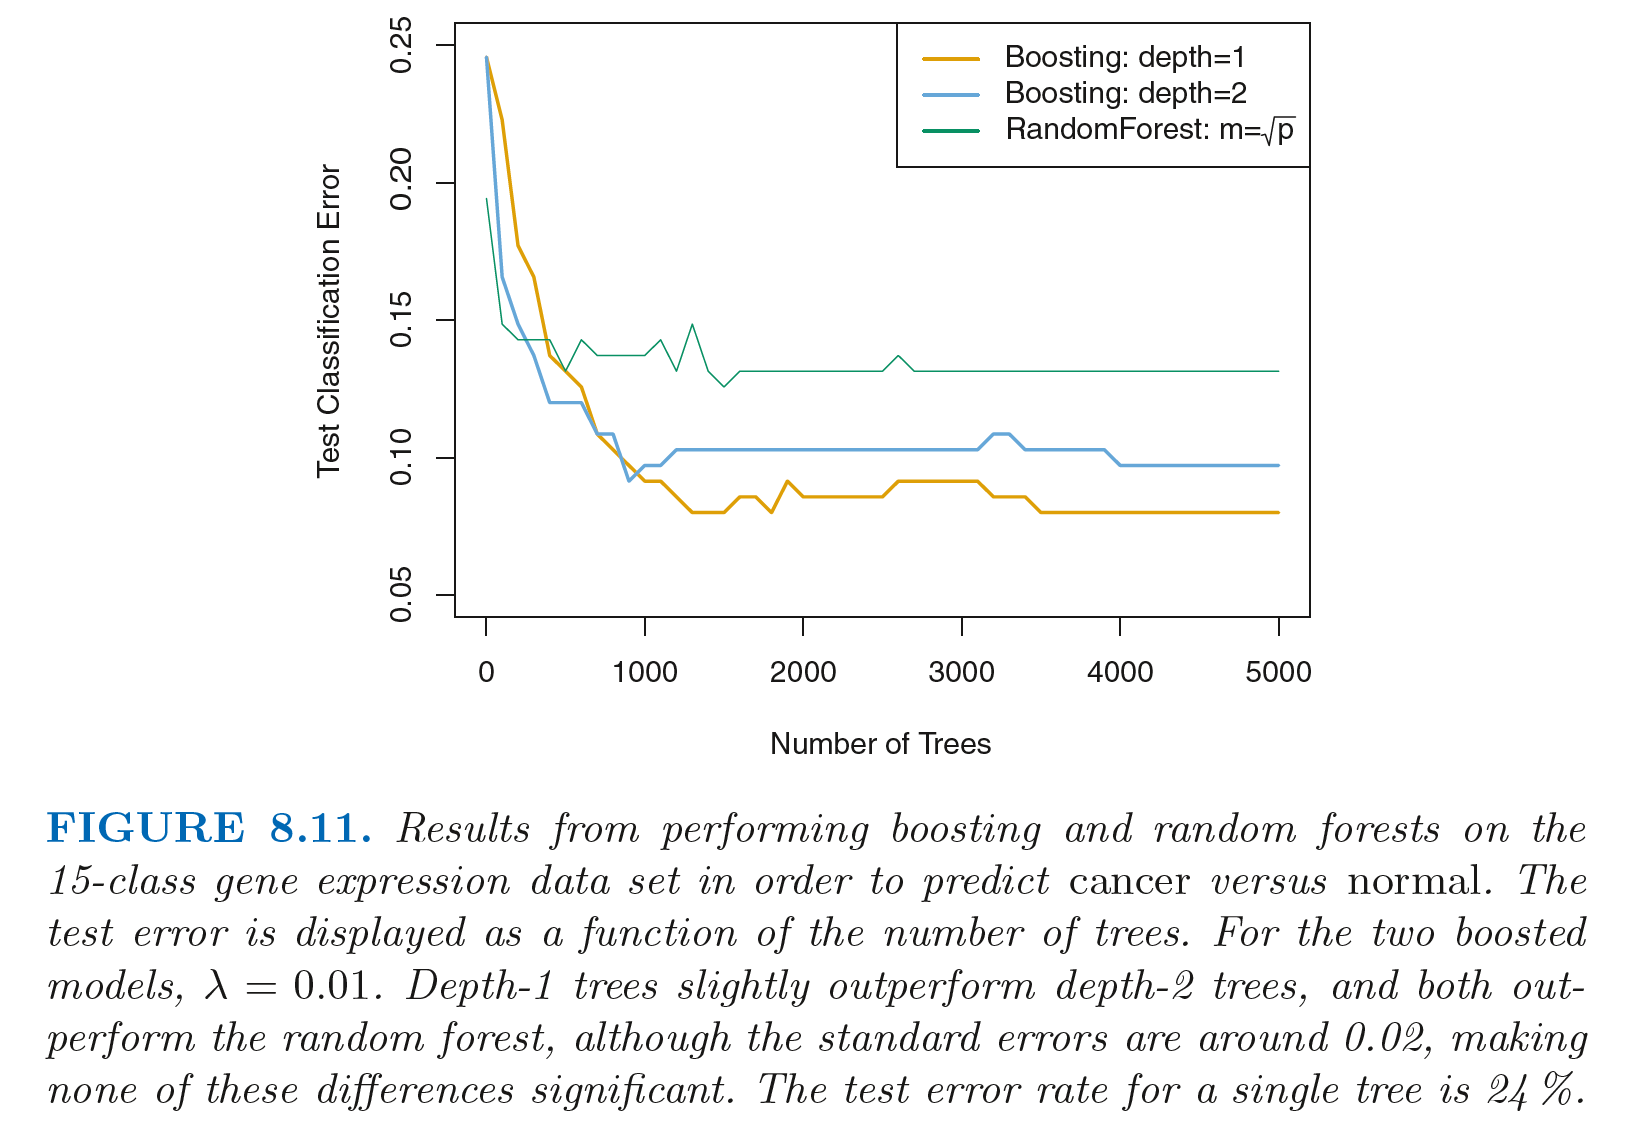

In [ ]:
Image('images/pw811.PNG', width =600)

### Lab: Boosting 实验室：提升

Now we'll use the `GradientBoostingRegressor` package to fit **boosted
regression trees** to the `Boston` data set. The
argument `n_estimators = 500` indicates that we want 500 trees, and the option
`interaction.depth = 4` limits the depth of each tree:

现在我们将使用 `GradientBoostingRegressor` 包将 **增强型
回归树** 拟合到 `Boston` 数据集。
参数 `n_estimators = 500` 表示我们想要 500 棵树，而选项
`interaction.depth = 4` 限制每棵树的深度：

In [ ]:
boosted_boston = GradientBoostingRegressor(n_estimators = 500,
                                           learning_rate = 0.01,
                                           max_depth = 4,
                                           random_state = 1)

boosted_boston.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1)

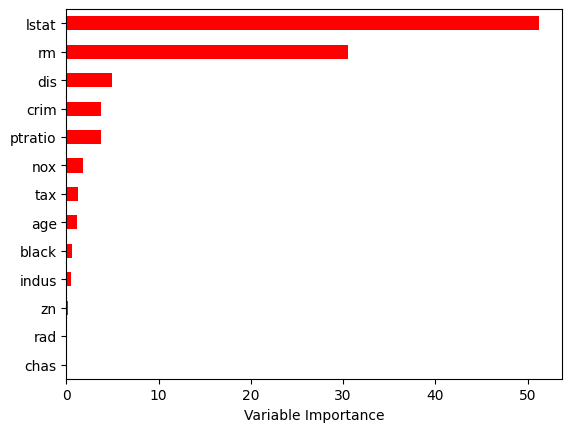

In [ ]:
## Let's check out the feature importances again:
## 让我们再次检查一下特征的重要性：

feature_importance = boosted_boston.feature_importances_*100

rel_imp = pd.Series(feature_importance,
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh',
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

We see that `lstat` and `rm` are again the most important variables by far. Now let's use the boosted model to predict `medv` on the test set:

我们看到，到目前为止，“lstat”和“rm”再次成为最重要的变量。现在让我们使用增强模型来预测测试集上的“medv”：

In [ ]:
mean_squared_error(y_test, boosted_boston.predict(X_test))

19.046377762502416

The test MSE obtained is similar to the test MSE for random forests
and superior to that for bagging. If we want to, we can perform boosting
with a different value of the shrinkage parameter $\lambda$. Here we take $\lambda = 0.2$:

获得的测试 MSE 与随机森林的测试 MSE 相似
并且优于 bagging。如果我们愿意，我们可以使用不同的收缩参数 $\lambda$ 值进行增强。这里我们取 $\lambda = 0.2$：

In [ ]:
boosted_boston2 = GradientBoostingRegressor(n_estimators = 500,
                                            learning_rate = 0.2,
                                            max_depth = 4,
                                            random_state = 1)
boosted_boston2.fit(X_train, y_train)

mean_squared_error(y_test, boosted_boston2.predict(X_test))

17.667086952596446

In this case, using $\lambda = 0.2$ leads to a slightly lower test MSE than $\lambda = 0.01$.

在这种情况下，使用 $\lambda = 0.2$ 会导致比 $\lambda = 0.01$ 略低的测试 MSE。


# Leo Breiman - Random Forest Creator (Leo Breiman - 随机森林创造者)
Excellent site and a fairly easy read: https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

优秀的网站，阅读起来相当容易：https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

# Extreme Gradient Boosting (XGBoost) 极端梯度提升
Winner of many kaggle competitions: See explanation of algorithm here: http://xgboost.readthedocs.io/en/latest/model.html#

许多 Kaggle 比赛的获胜者：请参阅此处的算法解释：http://xgboost.readthedocs.io/en/latest/model.html#

# Extremely Random Trees 极其随机的树
Random forests where only a random subset of the cutpoints are allowed. Choose the best cutpoint from that random set. http://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees

随机森林仅允许使用随机子集的切点。从该随机集合中选择最佳切点。http://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees

# Exercises

1. statistician or data scientist 统计学家或数据科学家

            do you like measure theory
           /                          \
          yes                          no
          /                             \
        statistician                   would you like to code for more than 4 hours each day
                                       /            \
                                     yes            no
                                     /               \
       taken more than 5 machine learning courses?   statistician  
       /                              \
       yes                           no
       /                              \
       do you like big data?           are you a frequentist?
       /              \                       /          \
       yes            no                     yes          no
       |               |                      |            |
       data scientist  stats              statistician   data scientist

# 2.
A sum of one depth trees are basis functions with indicator variables and a sum of basis functions is an additive model.

单深度树的和是带有指示变量的基函数，而基函数的和是加性模型。

# 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#3
p1 = np.linspace(0.001, .9999, 1000)
p2 = 1 - p1

In [ ]:
classification_error = 1 - np.column_stack((p1, p2)).max(axis=1)
gini = p1 * (1 - p1) + p2 * (1 - p2)
entropy = -(p1 * np.log(p1) + p2 * np.log(p2))

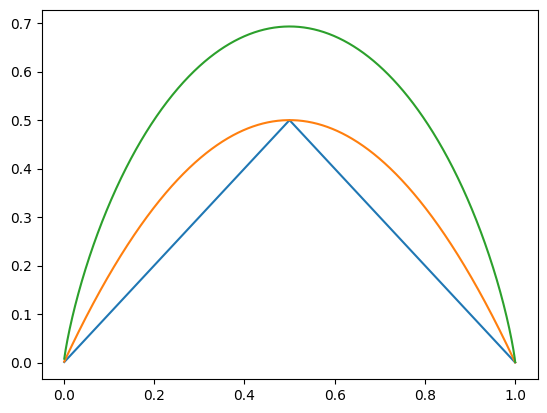

In [ ]:
plt.plot(p1, classification_error)
plt.plot(p1, gini)
plt.plot(p1, entropy);

# 4a
      x1 > 1
       /  \
     x2 > 1  5
     /     \  
    x1 < 0  15
    /      \
    x2>.5   3
    /   \
    0   10

# 4b

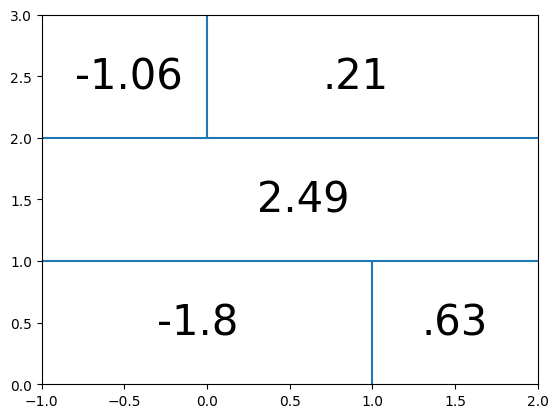

In [ ]:
plt.xlim(-1, 2)
plt.ylim(0, 3)
plt.hlines(1, -1, 2)
plt.vlines(1, 0, 1)
plt.hlines(2, -1, 2)
plt.vlines(0, 2, 3)
plt.text(-.3, .4, "-1.8", fontsize=30)
plt.text(1.3, .4, ".63", fontsize=30)
plt.text(.3, 1.4, "2.49", fontsize=30)
plt.text(-.8, 2.4, "-1.06", fontsize=30)
plt.text(.7, 2.4, ".21", fontsize=30);

 # 5
 Majority vote: Choose Red     
 Non-red: 4 votes  
 red: 6 votes  

 多数票：选择红色

非红色：4 票

红色：6 票


#### average probability 平均概率
choose green (.45)

选择绿色 (.45)

In [ ]:
# average Probability Choose green 平均概率选择绿色
np.mean([.1, .15, .2, .2, .55, .6, .6,.65, .7, .75])

0.45

# 6
For a regression tree, look through each feature and for each feature split the feature in two parts for each unique value of that feature and calcaulate RSS. Choose first split with lowest RSS.

Now you have two nodes, repeat procedure until only a set number of observations are left in each node

对于回归树，查看每个特征，并针对每个特征将该特征拆分为两部分，每个部分都有该特征的唯一值，然后计算 RSS。选择 RSS 最低的第一个拆分。

现在您有两个节点，重复此过程，直到每个节点只剩下一定数量的观察值

# 7

In [ ]:
import pandas as pd
boston = pd.read_csv('/content/boston.csv')

In [ ]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = boston.iloc[:, :-1]
y = boston['medv']

In [ ]:
from collections import defaultdict

In [ ]:
max_features_dict = defaultdict(list)

In [ ]:
max_features = range(1, X.shape[1] + 1)
num_trees = [5, 10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
for mf in max_features:
    for nm in num_trees:
        clf = RandomForestRegressor(oob_score=True, max_features=mf, n_estimators=nm)
        clf.fit(X, y)
        max_features_dict[mf].append(clf.oob_score_)

In [ ]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
    plt.plot(num_trees[:5], values[:5], label=mf)
plt.legend(loc=4)

In [ ]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
    plt.plot(num_trees[6:10], values[6:10], label=mf)
plt.legend(loc=4)

In [ ]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
    plt.plot(num_trees[11:], values[11:], label=mf)
plt.legend(loc=4)

# Conclusion 结论
Not much difference in R-squared after 20 trees and at least 3 predictor variables used at each node

在每个节点上使用 20 棵树和至少 3 个预测变量后，R 平方没有太大差异

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [ ]:
clf = DecisionTreeRegressor()

In [ ]:
carseats = pd.read_csv('data/carseats.csv')

In [ ]:
carseats.head()

In [ ]:
carseats = pd.get_dummies(carseats, drop_first=True)

In [ ]:
carseats.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = carseats.iloc[:, 1:]
y = carseats['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
from IPython.display import Image

In [ ]:
from sklearn.externals.six import StringIO

In [ ]:
import pydot
dot_data = StringIO()

In [ ]:
export_graphviz(clf, out_file=dot_data)

In [ ]:
dot_data

In [ ]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png("images/carseats_tree.png")

![image](images/carseats_tree.png)